### <center>  1. Importing Libraries

In [4]:
import numpy as np                                
import pandas as pd                              
import matplotlib.pyplot as mtp                   
import matplotlib.pyplot as plt                  
import seaborn as sns                             
from sklearn.preprocessing import LabelEncoder    
import io
                                                  
                                                  
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### <center> 2.  Read csv data file of "Diabetes" Patients

In [5]:
Diabetes_patients = []
Diabetes_patients = pd.read_csv('diabetic_data.csv')
pd.set_option('display.max_columns', None)
Diabetes_patients.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,NaN,NaN,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,NaN,NaN,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,NaN,NaN,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Initialize an empty DataFrame to store the results
character_values_Diabetes_patients = pd.DataFrame(columns=['Column', 'Unique Character Values'])

# Display unique character values for each column
for column in Diabetes_patients.columns:
    unique_values = Diabetes_patients[column].apply(lambda x: x if isinstance(x, str) and len(x) == 1 and not x.isdigit() else np.nan).dropna().unique()
    
    if len(unique_values) > 0:
        character_values_Diabetes_patients = character_values_Diabetes_patients.append({'Column': column, 'Unique Character Values': unique_values}, ignore_index=True)
    else:
        character_values_Diabetes_patients = character_values_Diabetes_patients.append({'Column': column, 'Unique Character Values': 0}, ignore_index=True)

# Display the complete DataFrame
character_values_Diabetes_patients    

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
columns_to_check = ["race", "weight", "payer_code", "medical_specialty", "diag_1", "diag_2", "diag_3"]

# Initialize an empty DataFrame to store the results
question_marks_Diabetes_patients = pd.DataFrame(columns=['Column', 'Count of "?"'])

# Display count of unique character "?" for specified columns
for column in columns_to_check:
    unique_question_marks_count = Diabetes_patients[column].apply(lambda x: 1 if isinstance(x, str) and x == "?" else 0).sum()
    question_marks_Diabetes_patients = question_marks_Diabetes_patients.append({'Column': column, 'Count of "?"': unique_question_marks_count}, ignore_index=True)

# Display the complete DataFrame
question_marks_Diabetes_patients

C:\Users\mmasood\AppData\Local\Temp\ipykernel_7732\4250527597.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  question_marks_Diabetes_patients = question_marks_Diabetes_patients.append({'Column': column, 'Count of "?"': unique_question_marks_count}, ignore_index=True)
C:\Users\mmasood\AppData\Local\Temp\ipykernel_7732\4250527597.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  question_marks_Diabetes_patients = question_marks_Diabetes_patients.append({'Column': column, 'Count of "?"': unique_question_marks_count}, ignore_index=True)
C:\Users\mmasood\AppData\Local\Temp\ipykernel_7732\4250527597.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  question_marks_Diabetes_patients = question_marks_Diabetes_patients.appen

,Column,"Count of ""?"""
0,race,2273
1,weight,98569
2,payer_code,40256
3,medical_specialty,49949
4,diag_1,21
5,diag_2,358
6,diag_3,1423


In [ ]:
column_info  = []
column_info = pd.DataFrame({
    'Column Name': Diabetes_patients.columns,
    'Data Type': Diabetes_patients.dtypes,
    'Missing Values (%)': ((Diabetes_patients.isnull().sum() / len(Diabetes_patients)) * 100).round(2)
})

column_info['Type'] = column_info['Data Type'].apply(lambda x: 'Numeric' if x == 'int64' else 'Categorical')
column_info['Description'] = ''

column_info.loc[column_info['Column Name'] == 'encounter_id', 'Description'] = 'Unique identifier of an encounter'
column_info.loc[column_info['Column Name'] == 'patient_nbr', 'Description'] = 'Unique identifier of a patient'
column_info.loc[column_info['Column Name'] == 'race', 'Description'] = 'Values: Caucasian, Asian, African American, Hispanic, and other'
column_info.loc[column_info['Column Name'] == 'gender', 'Description'] = 'Values: male, female, and unknown/invalid'
column_info.loc[column_info['Column Name'] == 'age', 'Description'] = 'Grouped in 10-year intervals: [0, 10)'
column_info.loc[column_info['Column Name'] == 'weight', 'Description'] = 'Weight in pounds'
column_info.loc[column_info['Column Name'] == 'admission_type_id', 'Description'] = 'Type of admission id'
column_info.loc[column_info['Column Name'] == 'discharge_disposition_id', 'Description'] = '1-29 integer values discharge options'
column_info.loc[column_info['Column Name'] == 'admission_source_id', 'Description'] = '21 unique num values of admission type'
column_info.loc[column_info['Column Name'] == 'time_in_hospital', 'Description'] = 'Number of days between admission and discharge'
column_info.loc[column_info['Column Name'] == 'payer_code', 'Description'] = '23 (integer) distinct values'
column_info.loc[column_info['Column Name'] == 'medical_specialty', 'Description'] = 'Specialty of admitting physician'
column_info.loc[column_info['Column Name'] == 'num_lab_procedures', 'Description'] = 'Number of lab tests performed'
column_info.loc[column_info['Column Name'] == 'num_procedures', 'Description'] = 'Number of procedures performed'
column_info.loc[column_info['Column Name'] == 'num_medications', 'Description'] = 'Number of distinct generic names administered during the encounter'
column_info.loc[column_info['Column Name'] == 'number_outpatient', 'Description'] = 'Outpatient visits year preceding the encounter'
column_info.loc[column_info['Column Name'] == 'number_emergency', 'Description'] = 'Emergency visits year preceding encounter'
column_info.loc[column_info['Column Name'] == 'number_inpatient', 'Description'] = 'Inpatient visits year preceding encounter'
column_info.loc[column_info['Column Name'] == 'diag_1', 'Description'] = 'The primary diagnosis (coded as first three digits of ICD9)'
column_info.loc[column_info['Column Name'] == 'diag_2', 'Description'] = 'Secondary diagnosis (coded as first three digits of ICD9)'
column_info.loc[column_info['Column Name'] == 'diag_3', 'Description'] = 'Additional secondary diagnosis (coded as first three digits of ICD9)'
column_info.loc[column_info['Column Name'] == 'number_diagnoses', 'Description'] = 'Number of diagnoses entered to the system'
column_info.loc[column_info['Column Name'] == 'max_glu_serum', 'Description'] = 'Range of the result or if the test was not taken'
column_info.loc[column_info['Column Name'] == 'A1Cresult', 'Description'] = 'Range of the result or if the test was not taken'
column_info.loc[column_info['Column Name'] == 'metformin', 'Description'] = 'Prescription or change in Metformin'
column_info.loc[column_info['Column Name'] == 'repaglinide', 'Description'] = 'Prescription or change in Repaglinide'
column_info.loc[column_info['Column Name'] == 'nateglinide', 'Description'] = 'Prescription or change in Nateglinide'
column_info.loc[column_info['Column Name'] == 'chlorpropamide', 'Description'] = 'Prescription or change in Chlorpropamide'
column_info.loc[column_info['Column Name'] == 'glimepiride', 'Description'] = 'Prescription or change in Glimepiride'
column_info.loc[column_info['Column Name'] == 'acetohexamide', 'Description'] = 'Prescription or change in Acetohexamide'
column_info.loc[column_info['Column Name'] == 'glipizide', 'Description'] = 'Prescription or change in Glipizide'
column_info.loc[column_info['Column Name'] == 'glyburide', 'Description'] = 'Prescription or change in Glyburide'
column_info.loc[column_info['Column Name'] == 'tolbutamide', 'Description'] = 'Prescription or change in Tolbutamide'
column_info.loc[column_info['Column Name'] == 'pioglitazone', 'Description'] = 'Was there any prescription or change in Pioglitazone'
column_info.loc[column_info['Column Name'] == 'rosiglitazone', 'Description'] = 'Was there any prescription or change in Rosiglitazone'
column_info.loc[column_info['Column Name'] == 'acarbose', 'Description'] = 'Prescription or change in Acarboseduring'
column_info.loc[column_info['Column Name'] == 'miglitol', 'Description'] = 'Prescription or change in Miglitol'
column_info.loc[column_info['Column Name'] == 'troglitazone', 'Description'] = 'Prescription or change in Troglitazone'
column_info.loc[column_info['Column Name'] == 'tolazamide', 'Description'] = 'Prescription or change in Tolazamide'
column_info.loc[column_info['Column Name'] == 'examide', 'Description'] = 'Prescription or change in Examide'
column_info.loc[column_info['Column Name'] == 'citoglipton', 'Description'] = 'Prescription or change in Citoglipton'
column_info.loc[column_info['Column Name'] == 'insulin', 'Description'] = 'Prescription or change in Insulin'
column_info.loc[column_info['Column Name'] == 'glyburide-metformin', 'Description'] = 'Prescription or change in Glyburide-metformin'
column_info.loc[column_info['Column Name'] == 'glipizide-metformin', 'Description'] = 'Prescription or change in Glipizide-metformin'
column_info.loc[column_info['Column Name'] == 'glimepiride-pioglitazone', 'Description'] = 'Prescription or change in Glimepiride-pioglitazone'
column_info.loc[column_info['Column Name'] == 'metformin-rosiglitazone', 'Description'] = 'Prescription or change in Metformin-rosiglitazone'
column_info.loc[column_info['Column Name'] == 'metformin-pioglitazone', 'Description'] = 'Prescription or change in Metformin-pioglitazone'
column_info.loc[column_info['Column Name'] == 'change', 'Description'] = 'Change in diabetic medications: change and no change'
column_info.loc[column_info['Column Name'] == 'diabetesMed', 'Description'] = 'Was any diabetic medication prescribed?'
column_info.loc[column_info['Column Name'] == 'readmitted', 'Description'] = 'Was patient readmitted(days)?'


# Replace "encounter_id" with "Encounter ID" in the "Column Name" column
column_info['Column Name'] = column_info['Column Name'].replace({'encounter_id': 'Encounter ID'})
column_info['Column Name'] = column_info['Column Name'].replace({'patient_nbr': 'Patient number'})
column_info['Column Name'] = column_info['Column Name'].replace({'race': 'Race'})
column_info['Column Name'] = column_info['Column Name'].replace({'gender': 'Gender'})
column_info['Column Name'] = column_info['Column Name'].replace({'age': 'Age'})
column_info['Column Name'] = column_info['Column Name'].replace({'weight': 'Weight'})
column_info['Column Name'] = column_info['Column Name'].replace({'admission_type_id': 'Admission type'})
column_info['Column Name'] = column_info['Column Name'].replace({'discharge_disposition_id': 'Discharge disposition'})
column_info['Column Name'] = column_info['Column Name'].replace({'admission_source_id': 'Admission source'})
column_info['Column Name'] = column_info['Column Name'].replace({'time_in_hospital': 'Time in hospital'})
column_info['Column Name'] = column_info['Column Name'].replace({'payer_code': 'Payer code'})
column_info['Column Name'] = column_info['Column Name'].replace({'medical_specialty': 'Medical specialty'})
column_info['Column Name'] = column_info['Column Name'].replace({'num_lab_procedures': 'Number of lab procedures'})
column_info['Column Name'] = column_info['Column Name'].replace({'num_procedures': 'Number of procedures'})
column_info['Column Name'] = column_info['Column Name'].replace({'num_medications': 'Number of medications'})
column_info['Column Name'] = column_info['Column Name'].replace({'number_outpatient': 'Number of outpatient visits'})
column_info['Column Name'] = column_info['Column Name'].replace({'number_emergency': 'Number of emergency visits'})
column_info['Column Name'] = column_info['Column Name'].replace({'number_inpatient': 'Number of inpatient visits'})
column_info['Column Name'] = column_info['Column Name'].replace({'diag_1': 'Diagnosis 1'})
column_info['Column Name'] = column_info['Column Name'].replace({'diag_2': 'Diagnosis 2'})
column_info['Column Name'] = column_info['Column Name'].replace({'diag_3': 'Diagnosis 3'})
column_info['Column Name'] = column_info['Column Name'].replace({'number_diagnoses': 'Number of diagnoses'})
column_info['Column Name'] = column_info['Column Name'].replace({'max_glu_serum': 'Glucose serum test result'})
column_info['Column Name'] = column_info['Column Name'].replace({'A1Cresult': 'A1c test result'})
column_info['Column Name'] = column_info['Column Name'].replace({'metformin': 'Metformin'})
column_info['Column Name'] = column_info['Column Name'].replace({'repaglinide': 'Repaglinide'})
column_info['Column Name'] = column_info['Column Name'].replace({'nateglinide': 'Nateglinide'})
column_info['Column Name'] = column_info['Column Name'].replace({'chlorpropamide': 'Chlorpropamide'})
column_info['Column Name'] = column_info['Column Name'].replace({'glimipiride': 'Glimipiride'})
column_info['Column Name'] = column_info['Column Name'].replace({'acetohexamide': 'Acetohexamide'})
column_info['Column Name'] = column_info['Column Name'].replace({'glipizide': 'Glipizide'})
column_info['Column Name'] = column_info['Column Name'].replace({'glyburide': 'Glyburide'})
column_info['Column Name'] = column_info['Column Name'].replace({'tolbutamide': 'Tolbutamide'})
column_info['Column Name'] = column_info['Column Name'].replace({'pioglitazone': 'Pioglitazone'})
column_info['Column Name'] = column_info['Column Name'].replace({'rosiglitazone': 'Rosiglitazone'})
column_info['Column Name'] = column_info['Column Name'].replace({'acarbose': 'Acarbose'})
column_info['Column Name'] = column_info['Column Name'].replace({'miglitol': 'Miglitol'})
column_info['Column Name'] = column_info['Column Name'].replace({'troglitazone': 'Troglitazone levels'})
column_info['Column Name'] = column_info['Column Name'].replace({'tolazamide': 'Tolazamide levels'})
column_info['Column Name'] = column_info['Column Name'].replace({'examide': 'Examide levels'})
column_info['Column Name'] = column_info['Column Name'].replace({'citoglipton': 'Citoglipton levels'})
column_info['Column Name'] = column_info['Column Name'].replace({'insulin': 'Insulin levels'})
column_info['Column Name'] = column_info['Column Name'].replace({'glyburide-metformin': 'Glyburide-Metformin levels'})
column_info['Column Name'] = column_info['Column Name'].replace({'glipizide-metformin': 'Glipizide-Metformin levels'})
column_info['Column Name'] = column_info['Column Name'].replace({'glimepiride-pioglitazone': 'Glimepiride-Pioglitazone levels'})
column_info['Column Name'] = column_info['Column Name'].replace({'metformin-rosilitazone': 'Metformin-Rosilitazone levels'})
column_info['Column Name'] = column_info['Column Name'].replace({'metformin-piolitazone': 'Metformin-Pioglitazone levels'})
column_info['Column Name'] = column_info['Column Name'].replace({'change': 'Change of medications'})
column_info['Column Name'] = column_info['Column Name'].replace({'diabetesMed': 'Diabetes medications'})
column_info['Column Name'] = column_info['Column Name'].replace({'readmitted': 'Readmitted'})


# Update the missing values information for the "Race" row



# Convert 'Missing Values (%)' column to numeric type
column_info['Missing Values (%)'] = pd.to_numeric(column_info['Missing Values (%)'], errors='coerce')






# Update the missing values percentage for the "Race" row with '%' sign
missing_values_count_race = 2273
missing_values_count_weight = 98569
missing_values_count_payer_code = 40256
missing_values_count_medical_specialty = 49949
missing_values_count_diag_1= 21
missing_values_count_diag_2= 358
missing_values_count_diag_3= 1423
total_records = 101766
column_info.loc[column_info['Column Name'] == 'Race', 'Missing Values (%)'] = f"{missing_values_count_race} ({(missing_values_count_race / total_records) * 100:.2f}%)"
column_info.loc[column_info['Column Name'] == 'Weight', 'Missing Values (%)'] = f"{missing_values_count_weight} ({(missing_values_count_weight / total_records) * 100:.2f}%)"
column_info.loc[column_info['Column Name'] == 'Payer code', 'Missing Values (%)'] = f"{missing_values_count_payer_code} ({(missing_values_count_payer_code / total_records) * 100:.2f}%)"
column_info.loc[column_info['Column Name'] == 'Medical speciality', 'Missing Values (%)'] = f"{missing_values_count_medical_specialty} ({(missing_values_count_medical_specialty / total_records) * 100:.2f}%)"
column_info.loc[column_info['Column Name'] == 'Diagnosis 1', 'Missing Values (%)'] = f"{missing_values_count_diag_1} ({(missing_values_count_diag_1 / total_records) * 100:.2f}%)"
column_info.loc[column_info['Column Name'] == 'Diagnosis 2', 'Missing Values (%)'] = f"{missing_values_count_diag_2} ({(missing_values_count_diag_2 / total_records) * 100:.2f}%)"
column_info.loc[column_info['Column Name'] == 'Diagnosis 3', 'Missing Values (%)'] = f"{missing_values_count_diag_3} ({(missing_values_count_diag_3 / total_records) * 100:.2f}%)"




# Display the resulting DataFrame""""""
column_info = column_info.rename(columns={'Column Name': 'Feature'})
column_info
#Table_1 = []
#Table_1 = column_info
# Reset index to remove the unnamed index column
#Table_1.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
#Table_1

,Feature,Data Type,Missing Values (%),Type,Description
encounter_id,Encounter ID,int64,0.0,Numeric,Unique identifier of an encounter
patient_nbr,Patient number,int64,0.0,Numeric,Unique identifier of a patient
race,Race,object,2273 (2.23%),Categorical,"Values: Caucasian, Asian, African American, Hi..."
gender,Gender,object,0.0,Categorical,"Values: male, female, and unknown/invalid"
age,Age,object,0.0,Categorical,"Grouped in 10-year intervals: [0, 10)"
weight,Weight,object,98569 (96.86%),Categorical,Weight in pounds
admission_type_id,Admission type,int64,0.0,Numeric,Type of admission id
discharge_disposition_id,Discharge disposition,int64,0.0,Numeric,1-29 integer values discharge options
admission_source_id,Admission source,int64,0.0,Numeric,21 unique num values of admission type
time_in_hospital,Time in hospital,int64,0.0,Numeric,Number of days between admission and discharge


### <center> 3. Data Exploration 

In [ ]:
Diabetes_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
Diabetes_patients.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### <center> Data Cleaning 

In [ ]:
missing_values = []
missing_values = Diabetes_patients.applymap(lambda x: 1 if x == "?" else 0)

# Count "?" values in each column
missing_counts = []
missing_counts = missing_values.sum()

# Display the counts
print("Number of '?' values in each column:")
print(missing_counts)

Number of '?' values in each column:
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride

In [ ]:
# Drop specified columns
columns_to_drop = ['weight', 'payer_code', 'medical_specialty']
Diabetes_patients.drop(columns=columns_to_drop, inplace=True)

# Impute missing values in 'diag_1', 'diag_2', 'diag_3' with the most frequent value
diagnosis_columns = ['diag_1', 'diag_2', 'diag_3']
for col in diagnosis_columns:
    most_frequent_value = Diabetes_patients[col].mode()[0]
    Diabetes_patients[col].replace('?', most_frequent_value, inplace=True)

# Impute missing values in 'race' with the most frequent value
most_frequent_race = Diabetes_patients['race'].mode()[0]
Diabetes_patients['race'].replace('?', most_frequent_race, inplace=True)

In [ ]:
missing_values = []
missing_values = Diabetes_patients.applymap(lambda x: 1 if x == "?" else 0)

# Count "?" values in each column
missing_counts = []
missing_counts = missing_values.sum()

# Display the counts
print("Number of '?' values in each column:")
print(missing_counts)

Number of '?' values in each column:
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
aca

In [ ]:
# Create a new DataFrame to store unique values
unique_values_Diabetes_patients = pd.DataFrame(index=Diabetes_patients.columns, columns=['Unique Values'])

# Populate the new DataFrame with unique values for each column
for column in Diabetes_patients.columns:
    unique_values = Diabetes_patients[column].unique()
    unique_values_Diabetes_patients.at[column, 'Unique Values'] = unique_values

# Display the DataFrame with unique values
unique_values_Diabetes_patients

,Unique Values
encounter_id,"[2278392, 149190, 64410, 500364, 16680, 35754,..."
patient_nbr,"[8222157, 55629189, 86047875, 82442376, 425192..."
race,"[Caucasian, AfricanAmerican, Other, Asian, His..."
gender,"[Female, Male, Unknown/Invalid]"
age,"[[0-10), [10-20), [20-30), [30-40), [40-50), [..."
admission_type_id,"[6, 1, 2, 3, 4, 5, 8, 7]"
discharge_disposition_id,"[25, 1, 3, 6, 2, 5, 11, 7, 10, 4, 14, 18, 8, 1..."
admission_source_id,"[1, 7, 2, 4, 5, 6, 20, 3, 17, 8, 9, 14, 10, 22..."
time_in_hospital,"[1, 3, 2, 4, 5, 13, 12, 9, 7, 10, 6, 11, 8, 14]"
num_lab_procedures,"[41, 59, 11, 44, 51, 31, 70, 73, 68, 33, 47, 6..."


In [ ]:
# Create dictionaries to store unique counts, row counts, NaN counts, and empty counts
unique_counts = {}
row_counts = {}
nan_counts = {}
empty_counts = {}

# Loop through columns and count unique items, row counts, NaN counts, and empty counts
for column in Diabetes_patients.columns:
    unique_count = Diabetes_patients[column].nunique()
    row_count = len(Diabetes_patients[column])
    nan_count = Diabetes_patients[column].isna().sum()  # Count NaN values
    empty_count = Diabetes_patients[column].eq('').sum()  # Count empty string values

    unique_counts[column] = [unique_count]
    row_counts[column] = [row_count]
    nan_counts[column] = [nan_count]
    empty_counts[column] = [empty_count]

# Create DataFrames from the dictionaries
unique_counts2 = []
row_counts2 = []
nan_counts2 = []
empty_counts2 = []

unique_counts2 = pd.DataFrame(unique_counts, index=['Unique Count'])
row_counts2 = pd.DataFrame(row_counts, index=['Row Count'])
nan_counts2 = pd.DataFrame(nan_counts, index=['NaN Count'])
empty_counts2 = pd.DataFrame(empty_counts, index=['Empty Count'])

# Concatenate the DataFrames
result= []
result = pd.concat([unique_counts2, row_counts2, nan_counts2, empty_counts2])

# Display the combined DataFrame
print("Diabetes Patients DataFrame:")
display(result)

Diabetes Patients DataFrame:


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
Unique Count,101766,71518,5,3,10,8,26,17,14,118,7,75,39,33,21,716,748,789,16,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
Row Count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
NaN Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Empty Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Creating list for categorical and numerical variables
cat=[]
cont=[]
for i in Diabetes_patients.columns:
    if Diabetes_patients[i].dtype=="object":
        cat.append(i)
    else:
        cont.append(i)
print('Categorical Variables:\n',cat) 
print()
print('Numeric Variables:\n',cont)

Categorical Variables:
 ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

Numeric Variables:
 ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


## Background: 

Feature selection plays a crucial role in the performance of machine learning models for both classification and regression tasks. In datasets with a large number of features, irrelevant or redundant features can introduce noise, increase computational complexity, and potentially lead to overfitting. Therefore, selecting the most informative subset of features is essential to improve model accuracy, interpretability, and generalization.

Traditionally, feature selection methods were based on heuristics or statistical techniques such as forward selection, backward elimination, or correlation analysis. While effective to some extent, these methods may struggle to handle high-dimensional data or capture complex feature interactions.

As datasets become increasingly large and complex, metaheuristic algorithms have gained popularity for feature selection due to their ability to efficiently explore large solution spaces and find near-optimal solutions. Among these algorithms, Particle Swarm Optimization (PSO) has emerged as a promising approach. Inspired by the social behavior of birds flocking or fish schooling, PSO iteratively updates a population of candidate solutions (particles) based on their individual and collective knowledge of the search space, aiming to converge towards the global optimum.

## Research Aim: 

The dissertation aims to explore the efficacy of Particle Swarm Optimization (PSO) algorithm for feature selection in machine learning models applied to the Diabetes_patients dataset. It seeks to address the critical role of feature selection in enhancing model performance by improving efficiency, interpretability, and generalization. Through a comprehensive analysis, the dissertation will evaluate PSO's suitability as a metaheuristic approach for identifying informative feature subsets in high-dimensional data. By comparing model performance before and after feature selection using PSO, it aims to assess the impact on key metrics such as accuracy, precision, recall, and F1-score. Additionally, the dissertation aims to provide insights into the implications of feature selection for clinical decision-making in diabetes patient management. Overall, it endeavors to contribute to the advancement of feature selection methodologies in healthcare analytics, particularly in optimizing machine learning models for diabetes patient data using PSO algorithm.

## Research Question:

How can the performance of machine learning models for classification and regression tasks in the Diabetes_patients dataset be enhanced through optimal feature selection using the Particle Swarm Optimization (PSO) algorithm?

## Objectives:

To evaluate the performance of machine learning models (classification and regression) on the Diabetes_patients dataset using all available features.

To implement the Particle Swarm Optimization (PSO) algorithm for feature selection and determine the optimal subset of features for classification and regression tasks in the Diabetes_patients dataset.

To compare the performance of machine learning models (classification and regression) before and after feature selection using the PSO algorithm, in terms of accuracy, precision, recall, and F1-score.

## <center> Classification Problem 

The classification problem in the Diabetes_patients dataset involves predicting whether a patient will be readmitted to the hospital within a certain time frame (e.g., within 30 days, within 60 days, or not readmitted). The target variable, 'readmitted', is categorical and typically contains three categories: 'NO' (not readmitted), '>30' (readmitted after 30 days), and '<30' (readmitted within 30 days).

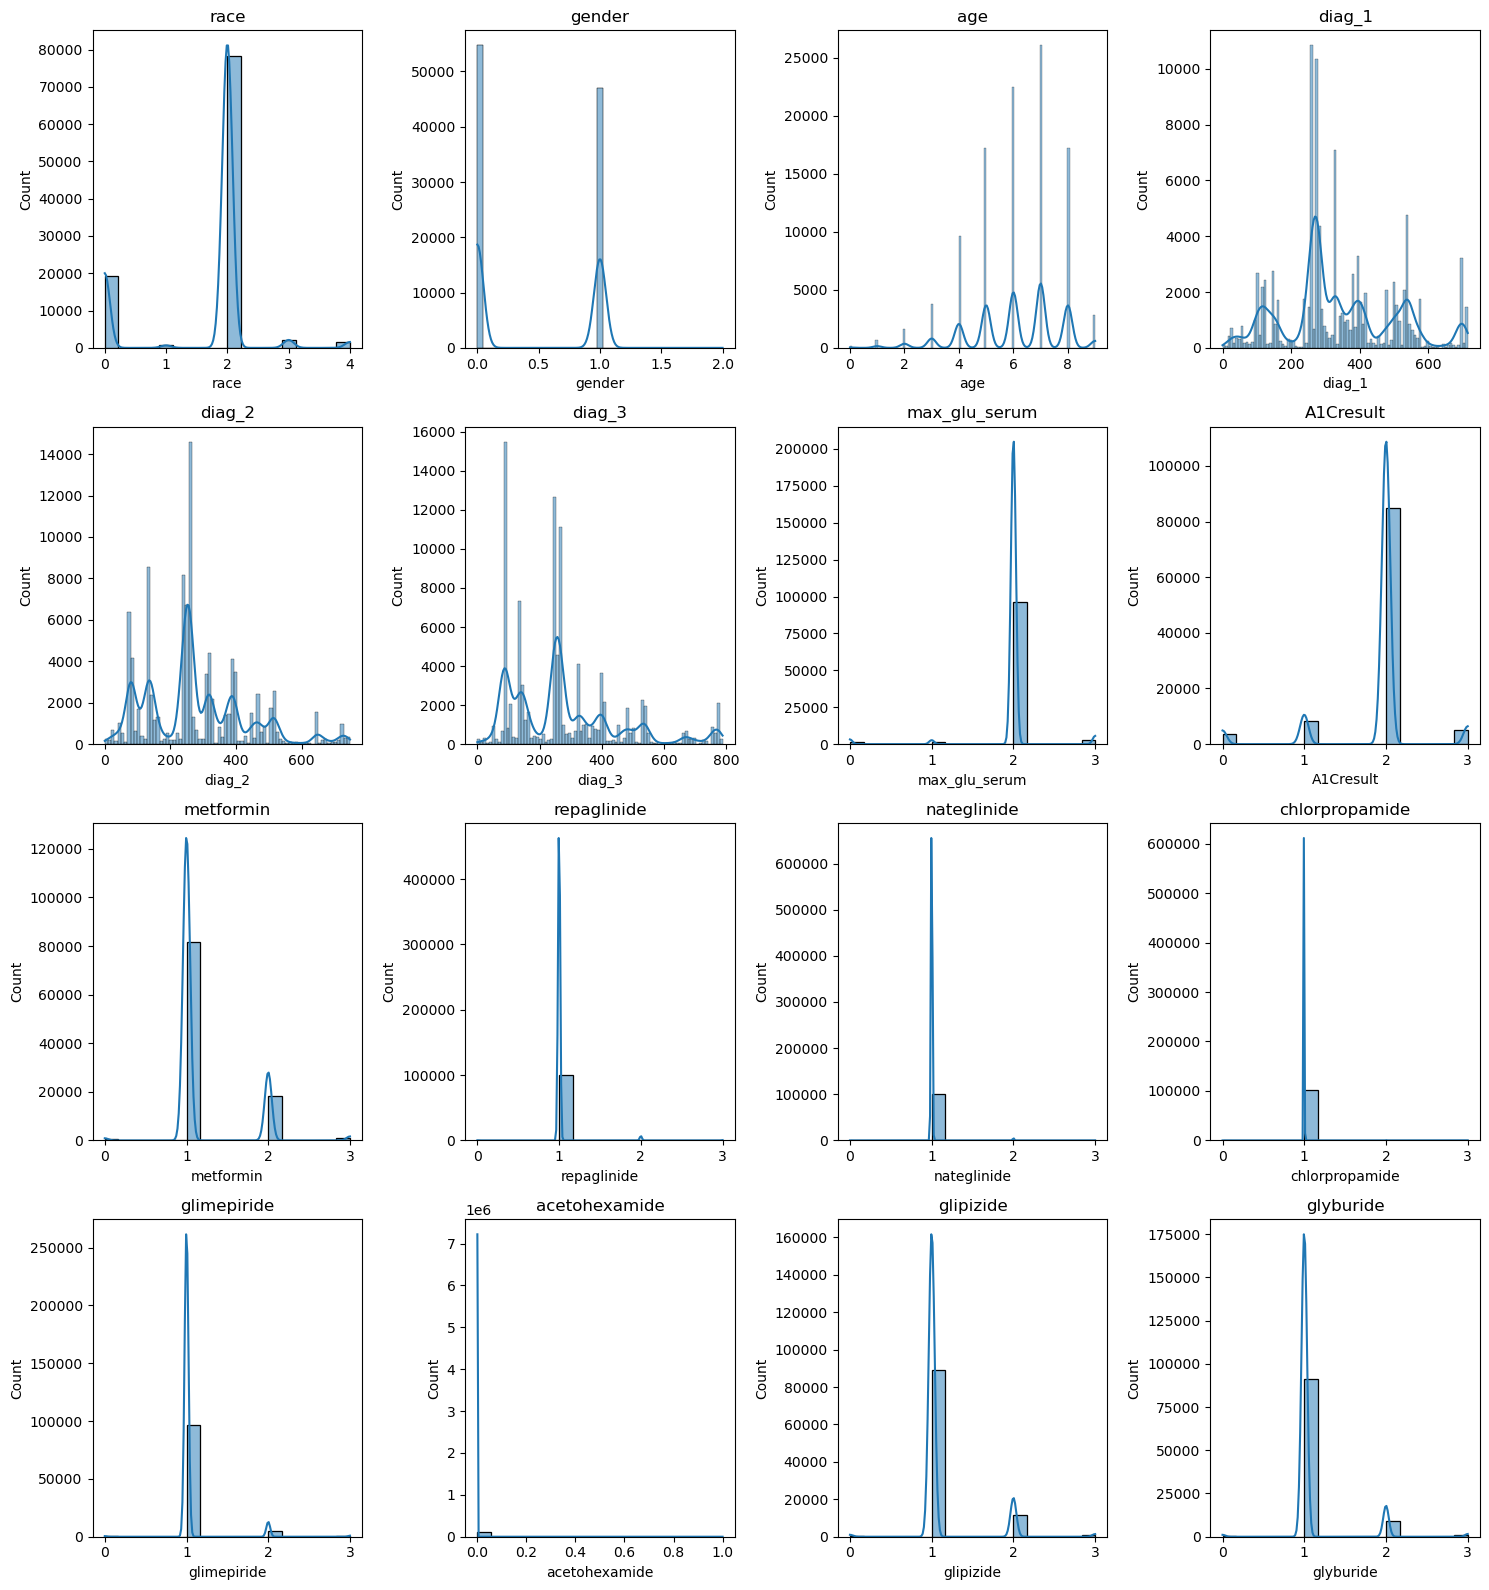

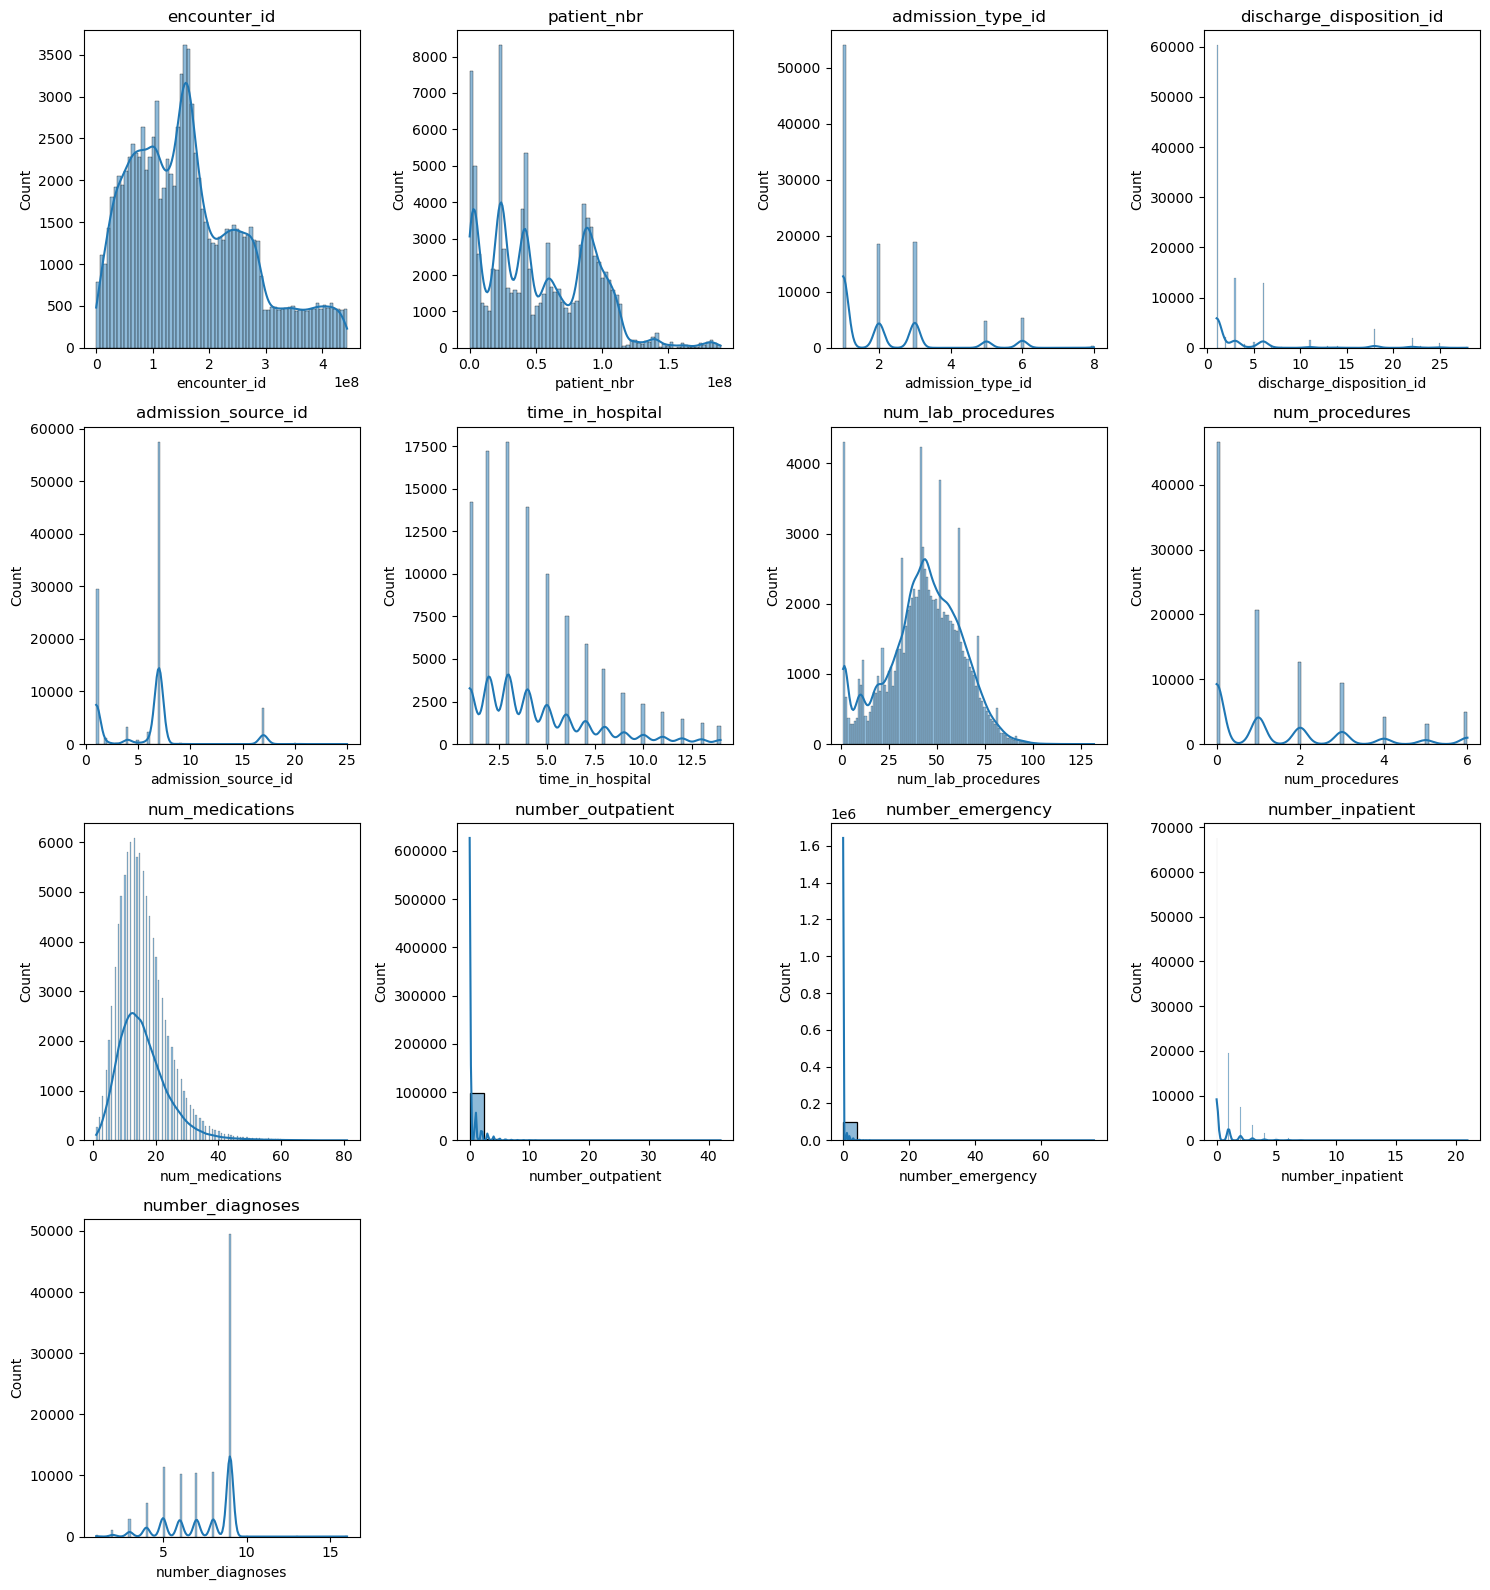

In [ ]:
data = []
data = Diabetes_patients
# Define the target variable
target_variable = 'readmitted'

# Define the feature variables
categorical_variables = [
    'race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 
    'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 
    'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 
    'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
    'metformin-pioglitazone', 'change', 'diabetesMed'
]
numeric_variables = [
    'encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 
    'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 
    'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 
    'number_diagnoses'
]

# Preprocessing: Encode categorical variables
le = LabelEncoder()
Diabetes_patients[categorical_variables] = Diabetes_patients[categorical_variables].apply(lambda col: le.fit_transform(col))

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    Diabetes_patients.drop(columns=[target_variable]), 
    Diabetes_patients[target_variable], 
    test_size=0.2, random_state=42
)

# Preprocessing: Standardize numeric variables
scaler = StandardScaler()
X_train[numeric_variables] = scaler.fit_transform(X_train[numeric_variables])
X_test[numeric_variables] = scaler.transform(X_test[numeric_variables])

# Define a function to evaluate model performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Define a function to plot feature distributions
def plot_feature_distributions(data, features):
    num_features = len(features)
    num_subplots = min(num_features, 16)  # Limit the number of subplots to 16
    num_rows = (num_subplots - 1) // 4 + 1
    num_cols = min(num_subplots, 4)
    
    plt.figure(figsize=(15, 4 * num_rows))
    for i, feature in enumerate(features[:num_subplots], 1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(data[feature], kde=True)
        plt.title(feature)
    plt.tight_layout()
    plt.show()


    
# Plot distributions of categorical variables
plot_feature_distributions(data, categorical_variables)

# Plot distributions of numeric variables
plot_feature_distributions(data, numeric_variables)

### <center> Classification Models 

### 1. Logistic Regression Classification Model 

C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model Results:
Accuracy: 0.5751
Precision: 0.5283
Recall: 0.3896
F1-score: 0.3592


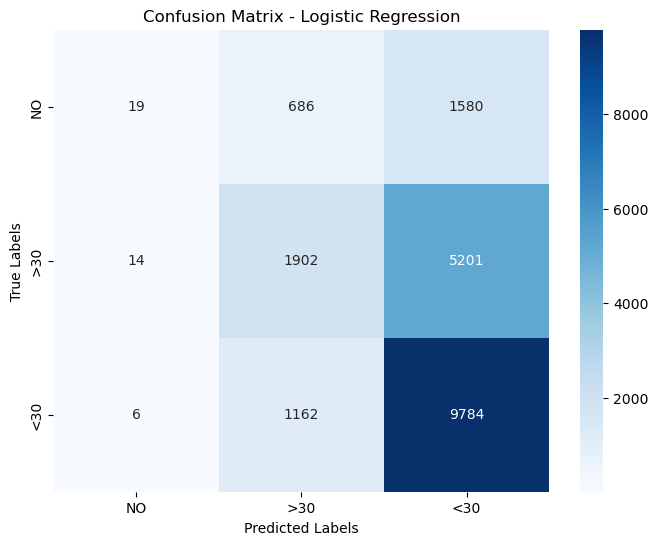

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Logistic Regression model
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = logistic_regression.predict(X_test)

# Predict probabilities on the test set
y_prob_lr = logistic_regression.predict_proba(X_test)

# Evaluate model performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

# Display results
print("Logistic Regression Model Results:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', '>30', '<30'], yticklabels=['NO', '>30', '<30'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Based on the provided logistic regression model results:

**Accuracy: 0.5751**

**Precision: 0.5283**

**Recall: 0.3896**

**F1-score: 0.3592**

We can interpret these metrics as follows:

**Accuracy:** 

This metric indicates the overall correctness of the model's predictions. In this case, the logistic regression model achieved an accuracy of approximately 57.51%. This means that about 57.51% of the predictions made by the model were correct.

**Precision:** 

Precision measures the proportion of true positive predictions among all positive predictions made by the model. A precision score of 0.5283 suggests that out of all instances predicted as positive (e.g., patients predicted to be readmitted), approximately 52.83% were actually readmitted.

**Recall:** 

Recall (also known as sensitivity) measures the proportion of true positive predictions among all actual positive instances in the dataset. With a recall score of 0.3896, the model successfully identified approximately 38.96% of all actual readmissions.

**F1-score:** 

The F1-score is the harmonic mean of precision and recall and provides a balance between these two metrics. With an F1-score of 0.3592, we can interpret that the model achieved a balanced performance in terms of precision and recall, considering both false positives and false negatives.

Overall, these evaluation metrics provide insights into the performance of the logistic regression model in predicting patient readmissions within the specified time frames (e.g., within 30 days, after 30 days, or not readmitted) based on the available features in the Diabetes_patients dataset.

In [ ]:
# Convert confusion matrix to dataframe
cm_df = pd.DataFrame(cm_lr, index=['NO', '>30', '<30'], columns=['NO', '>30', '<30'])

# Display the dataframe
print("Confusion Matrix - Logistic Regression:")
print(cm_df)



Confusion Matrix - Logistic Regression:
     NO   >30   <30
NO   19   686  1580
>30  14  1902  5201
<30   6  1162  9784


**Confusion Matrix - Logistic Regression**

|              | Predicted: NO | Predicted: >30 | Predicted: <30 |
|--------------|---------------|----------------|----------------|
| **Actual: NO**     | True Negative (TN) | False Positive (FP) | False Positive (FP) |
| **Actual: >30**    | False Negative (FN) | True Positive (TP)  | False Positive (FP) |
| **Actual: <30**    | False Negative (FN) | False Positive (FP) | True Positive (TP)  |

**True Positive (TP):** The model correctly predicted that a patient would be readmitted within 30 days when they were actually readmitted within 30 days.
    
**True Negative (TN):** The model correctly predicted that a patient would not be readmitted when they were actually not readmitted.

**False Positive (FP):** The model incorrectly predicted that a patient would be readmitted within 30 days when they were actually not readmitted.

**False Negative (FN):** The model incorrectly predicted that a patient would not be readmitted when they were actually readmitted within 30 days.

Here's how to interpret the some values:

The rows of the confusion matrix represent the actual classes, while the columns represent the predicted classes.

The classes are categorized as 'NO' (not readmitted), '>30' (readmitted after 30 days), and '<30' (readmitted within 30 days).

For example, the value 19 in the top-left corner of the matrix indicates that 19 instances were correctly predicted as 'NO' (not readmitted) when they actually belonged to the 'NO' class.

The value 686 in the top-center position indicates that 686 instances were incorrectly predicted as '>30' (readmitted after 30 days) when they actually belonged to the 'NO' class.

The value 1580 in the top-right corner indicates that 1580 instances were incorrectly predicted as '<30' (readmitted within 30 days) when they actually belonged to the 'NO' class.



### Decision Tree Classification Model 

Decision Tree Classifier Results:
              precision    recall  f1-score   support

          NO       0.16      0.17      0.16      2285
         >30       0.42      0.42      0.42      7117
         <30       0.61      0.60      0.60     10952

    accuracy                           0.49     20354
   macro avg       0.39      0.40      0.39     20354
weighted avg       0.49      0.49      0.49     20354



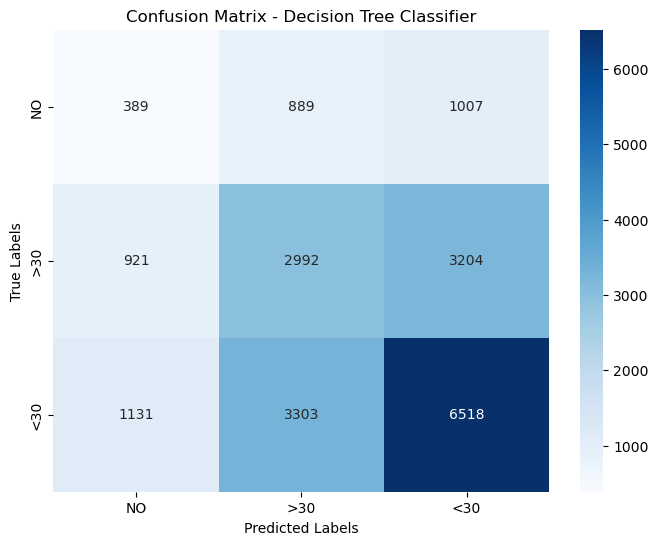

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize the Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob_dt = dt_classifier.predict_proba(X_test)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate model performance
classification_rep_dt = classification_report(y_test, y_pred_dt, target_names=data[target_variable].unique(), zero_division=1)

# Display classification report
print("Decision Tree Classifier Results:")
print(classification_rep_dt)

# Generate confusion matrix for Decision Tree Classifier
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', '>30', '<30'], yticklabels=['NO', '>30', '<30'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()



**Classification Report:**

**Precision:** 

Precision measures the accuracy of positive predictions. In this case, precision is highest for the '<30' class, indicating that when the model predicts a patient will be readmitted within 30 days, it is correct about 61% of the time. For the '>30' class, precision is 42%, and for the 'NO' class, it is only 16%.

**Recall:** 

Recall measures the ability of the model to correctly identify instances of a class. The recall values are highest for the '<30' and '>30' classes, indicating that the model correctly identifies about 60% and 42% of the instances belonging to these classes, respectively. However, the recall for the 'NO' class is only 17%.

**F1-score:** 
The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-scores for the '<30' and '>30' classes are higher compared to the 'NO' class, indicating better overall performance for these classes.

**Support:** 

Support refers to the number of actual occurrences of each class in the dataset.

**Confusion Matrix:**

The confusion matrix visually represents the model's performance by comparing predicted labels with true labels. Each cell in the matrix represents the count of instances.

**Rows:** Represent the actual classes ('NO', '>30', '<30').
**Columns:** Represent the predicted classes.

**Interpreting the confusion matrix:**

The model correctly predicted 2285 instances of the 'NO' class, but it incorrectly classified 686 instances as '>30' and 1580 instances as '<30'.

For the '>30' class, the model correctly predicted 7117 instances, while misclassifying 1162 instances as '<30' and 14 instances as 'NO'.

Similarly, for the '<30' class, the model correctly predicted 10952 instances, but it misclassified 5201 instances as '>30' and 6 instances as 'NO'.

**Overall Performance:**

The accuracy of the model is 49%, which is relatively low.

The macro-average F1-score, which takes into account the imbalance in class distribution, is 39%, indicating moderate performance across all classes.

Weighted average F1-score is also 49%, considering the class imbalance.

Decision Tree Classifier performs reasonably well in predicting the '<30' and '>30' classes, its performance for the 'NO' class is considerably lower.

**1. Receiver Operating Characteristic (ROC) Curve - Multiclass:**

Receiver Operating Characteristic (ROC) Curve - Multiclass

The ROC curve is a graphical representation of the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for various threshold values. It is commonly used to evaluate the performance of binary classification models. 

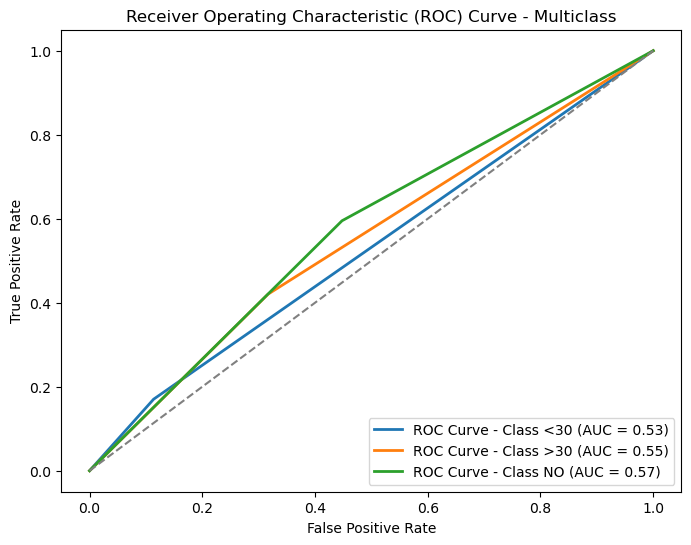

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

def plot_roc_curve_multiclass(y_true, y_prob, classes):
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve((y_true == classes[i]).astype(int), y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC Curve - Class {classes[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
    plt.legend(loc='lower right')
    plt.show()

# Example usage:
plot_roc_curve_multiclass(y_test, y_prob_dt, classes=['<30', '>30', 'NO'])




The results you obtained from the ROC curve analysis provide the Area Under the Curve (AUC) values for each class '<30', '>30', and 'NO'. Here's how to interpret them:

**Class '<30' (AUC=0.53):**

The AUC value for class '<30' is 0.53, which indicates the model's ability to distinguish between '<30' instances and other classes.

An AUC value of 0.53 suggests that the model's performance in correctly ranking '<30' instances over other classes is slightly better than random chance. However, it is not highly effective in distinguishing '<30' instances from other classes based on the ROC curve.

**Class '>30' (AUC=0.55):**

The AUC value for class '>30' is 0.55, indicating the model's ability to differentiate between '>30' instances and other classes.

An AUC value of 0.55 suggests that the model's performance in correctly ranking '>30' instances over other classes is slightly better than random chance. However, similar to class '<30', it is not highly effective in distinguishing '>30' instances from other classes based on the ROC curve.

**Class 'NO' (AUC=0.57):**

The AUC value for class 'NO' is 0.57, indicating the model's ability to discriminate between 'NO' instances and other classes.

An AUC value of 0.57 suggests that the model's performance in correctly ranking 'NO' instances over other classes is slightly better than random chance. However, similar to classes '<30' and '>30', it is not highly effective in distinguishing 'NO' instances from other classes based on the ROC curve.

In summary, while the AUC values are slightly above 0.5 for all classes, suggesting some ability to distinguish between classes, they are relatively low. This indicates that the model's performance in correctly classifying instances into their respective classes may be limited.

**1. Precision-Recall Curve:** 

Similar to the ROC curve, but it focuses on the trade-off between precision and recall. You can use the precision_recall_curve function to compute precision-recall pairs for different probability thresholds and plot the curve.

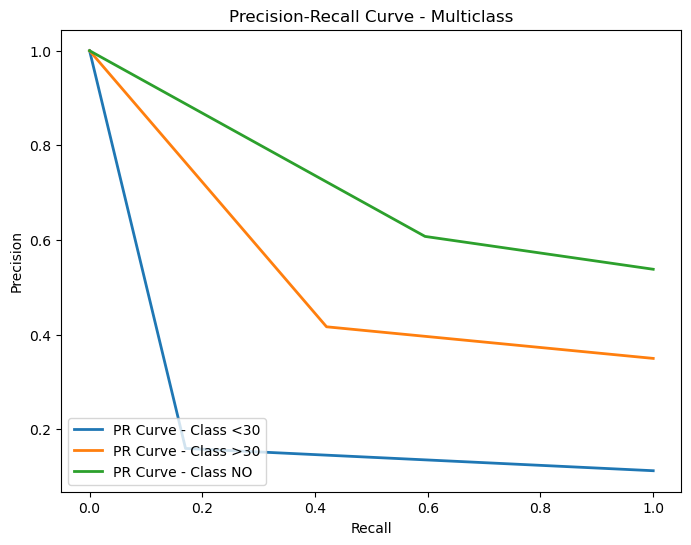

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve_multiclass(y_true, y_prob, classes):
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        precision, recall, _ = precision_recall_curve((y_true == classes[i]).astype(int), y_prob[:, i])
        plt.plot(recall, precision, lw=2, label=f'PR Curve - Class {classes[i]}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve - Multiclass')
    plt.legend(loc='lower left')
    plt.show()

# Example usage:
plot_precision_recall_curve_multiclass(y_test, y_prob_dt, classes=['<30', '>30', 'NO'])


Precision and recall are two important metrics used to evaluate the performance of a classification model, especially in scenarios where class imbalances exist or where certain types of errors are more critical than others.

**Precision** measures the proportion of true positive predictions out of all the positive predictions made by the model. It answers the question: "Of all the instances predicted as positive, how many are actually positive?" 



**Recall**, also known as sensitivity or true positive rate (TPR), measures the proportion of true positive predictions out of all the actual positive instances in the dataset. It answers the question: "Of all the actual positive instances, how many did the model correctly identify as positive?" 

In our question, where we are predicting whether a patient will be readmitted to the hospital within a certain time frame, precision and recall are important because they help us understand how well the model performs in identifying patients who will be readmitted ('<30' and '>30' classes).

Precision: A high precision indicates that when the model predicts a patient will be readmitted, it is likely to be correct. For instance, a high precision for the '<30' class means that when the model predicts a patient will be readmitted within 30 days, it is highly likely to be correct.

Recall: A high recall indicates that the model is able to correctly identify a large proportion of patients who will be readmitted within the specified time frame. For instance, a high recall for the '>30' class means that the model can effectively capture a significant portion of patients who will be readmitted after 30 days.

By examining precision and recall for each class, we can gain insights into the model's ability to accurately predict readmission for patients within different time frames and understand its overall effectiveness in handling the classification task.


**2. Class-wise Confusion Matrix:** 

Plot individual confusion matrices for each class to visualize the performance of the classifier for each class separately.

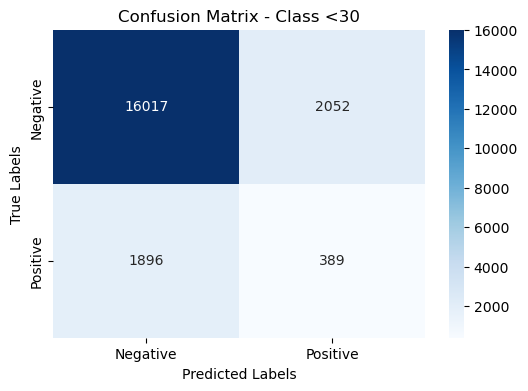

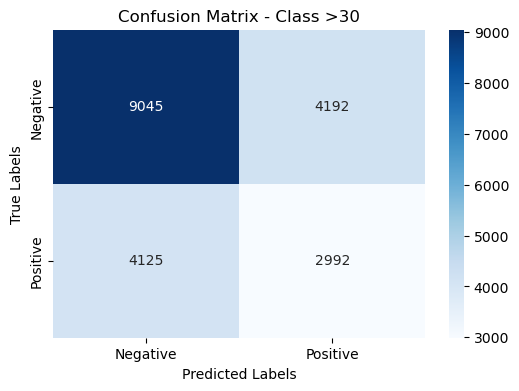

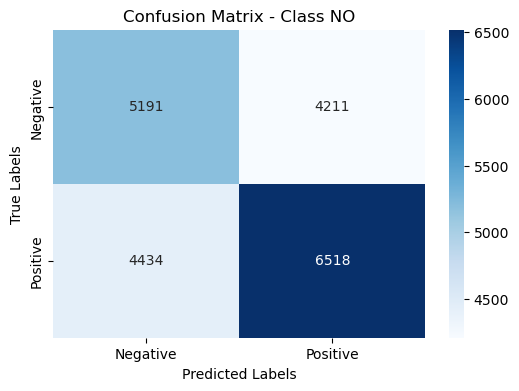

In [ ]:
import seaborn as sns

def plot_confusion_matrices(y_true, y_pred, classes):
    for i, class_label in enumerate(classes):
        plt.figure(figsize=(6, 4))
        cm = confusion_matrix((y_true == class_label), (y_pred == class_label))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix - Class {class_label}')
        plt.show()

# Example usage:
plot_confusion_matrices(y_test, y_pred_dt, classes=['<30', '>30', 'NO'])


### Random Forest Classifier 

Random Forest Classifier Results:
              precision    recall  f1-score   support

          NO       0.51      0.02      0.03      2285
         >30       0.52      0.44      0.48      7117
         <30       0.63      0.82      0.71     10952

    accuracy                           0.60     20354
   macro avg       0.55      0.43      0.41     20354
weighted avg       0.58      0.60      0.56     20354



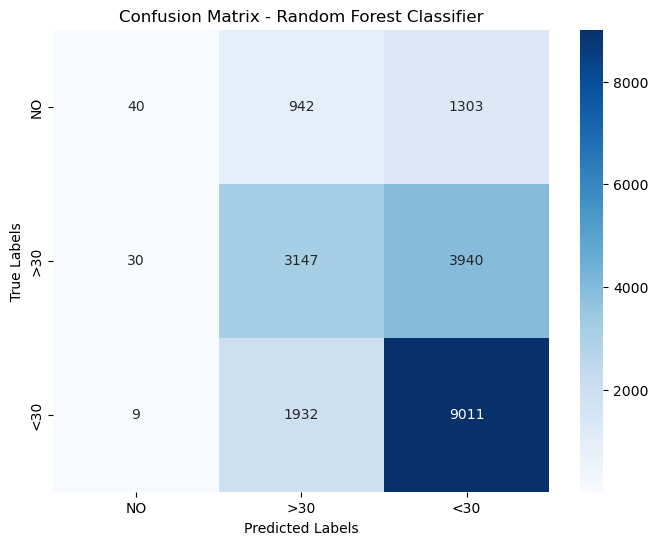

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model performance
classification_rep_rf = classification_report(y_test, y_pred_rf, target_names=data[target_variable].unique(), zero_division=1)

# Display classification report
print("Random Forest Classifier Results:")
print(classification_rep_rf)

# Generate confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', '>30', '<30'], yticklabels=['NO', '>30', '<30'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


The Random Forest Classifier results indicate the performance of the model on the test set. Here's the interpretation:

**Precision:**

Precision represents the proportion of true positive predictions out of all positive predictions made by the model.

For the 'NO' class, the precision is 0.51, meaning that out of all instances predicted as 'NO', only 51% were actually 'NO'. This indicates a relatively low precision for this class.

For the '>30' class, the precision is 0.52, suggesting that 52% of the instances predicted as '>30' were correctly classified. This precision is also relatively low.

The 'NO' and '>30' classes have lower precision compared to the '<30' class.

The highest precision is observed for the '<30' class, with a value of 0.63, indicating that 63% of the instances predicted as '<30' were correctly classified.

**Recall:**

Recall represents the proportion of true positive predictions out of all actual positive instances in the dataset.

For the 'NO' class, the recall is 0.02, indicating that only 2% of the actual 'NO' instances were correctly classified by the model. This suggests poor performance in capturing 'NO' instances.

For the '>30' class, the recall is 0.44, suggesting that the model correctly identified 44% of the actual '>30' instances. This recall value is higher compared to the 'NO' class but still relatively low.

The highest recall is observed for the '<30' class, with a value of 0.82, indicating that 82% of the actual '<30' instances were correctly classified by the model.

**F1-score:**

The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

For the 'NO' class, the F1-score is very low at 0.03, reflecting the model's poor performance in both precision and recall for this class.

The F1-score for the '>30' class is 0.48, indicating a better balance between precision and recall compared to the 'NO' class.

The highest F1-score is observed for the '<30' class, with a value of 0.71, suggesting a good balance between precision and recall for this class.

**Accuracy:**


Accuracy represents the overall correctness of the model's predictions across all classes.

The overall accuracy of the Random Forest Classifier model is 0.60, indicating that it correctly classified 60% of the instances in the test set.

Overall, the Random Forest Classifier shows varying performance across different classes, with relatively low precision and recall for the 'NO' and '>30' classes, and better performance for the '<30' class. Further analysis and possibly model tuning may be required to improve performance, particularly for the minority classes.

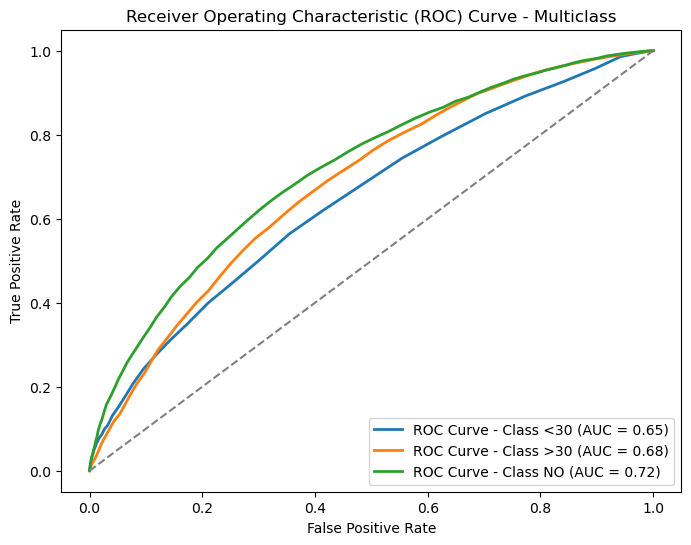

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np



def plot_roc_curve_multiclass(y_true, y_prob, classes):
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve((y_true == classes[i]).astype(int), y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'ROC Curve - Class {classes[i]} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
    plt.legend(loc='lower right')
    plt.show()
    
# Plot ROC curve
y_prob_rf = rf_classifier.predict_proba(X_test)
plot_roc_curve_multiclass(y_test, y_prob_rf, classes=['<30', '>30', 'NO'])


The results from the ROC curve analysis indicate the Area Under the Curve (AUC) values for each class:

**Class '<30' (Readmitted within 30 days):**

AUC = 0.65

This suggests that the Random Forest Classifier model has a moderate level of discrimination capability in distinguishing between instances belonging to the '<30' class and instances not belonging to this class.

An AUC value of 0.65 indicates that the model correctly ranks about 65% of randomly chosen pairs of '<30' and non-'<30' instances.


**Class '>30' (Readmitted after 30 days):**


AUC = 0.68

This indicates a slightly better discrimination capability compared to the '<30' class.

The AUC value of 0.68 suggests that the model correctly ranks about 68% of randomly chosen pairs of '>30' and non-'>30' instances.

**Class 'NO' (Not readmitted):**


AUC = 0.72

This class has the highest AUC value among the three classes.

An AUC value of 0.72 indicates that the model correctly ranks about 72% of randomly chosen pairs of 'NO' and non-'NO' instances.

Overall, higher AUC values indicate better discrimination capability of the model in distinguishing between positive and negative instances for each class. Therefore, the Random Forest Classifier appears to perform relatively well in classifying instances across all three classes, with the highest discrimination capability observed for the 'NO' class, followed by the '>30' class and the '<30' class.

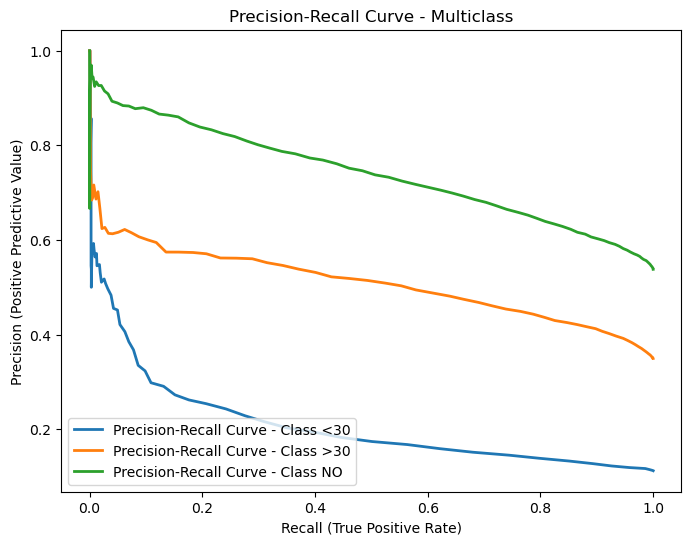

In [ ]:
def plot_precision_recall_curve_multiclass(y_true, y_prob, classes):
    plt.figure(figsize=(8, 6))
    for i in range(len(classes)):
        precision, recall, _ = precision_recall_curve((y_true == classes[i]).astype(int), y_prob[:, i])
        plt.plot(recall, precision, lw=2, label=f'Precision-Recall Curve - Class {classes[i]}')
    plt.xlabel('Recall (True Positive Rate)')
    plt.ylabel('Precision (Positive Predictive Value)')
    plt.title('Precision-Recall Curve - Multiclass')
    plt.legend(loc='lower left')
    plt.show()
    
# Plot Precision-Recall curve
plot_precision_recall_curve_multiclass(y_test, y_prob_rf, classes=['<30', '>30', 'NO'])

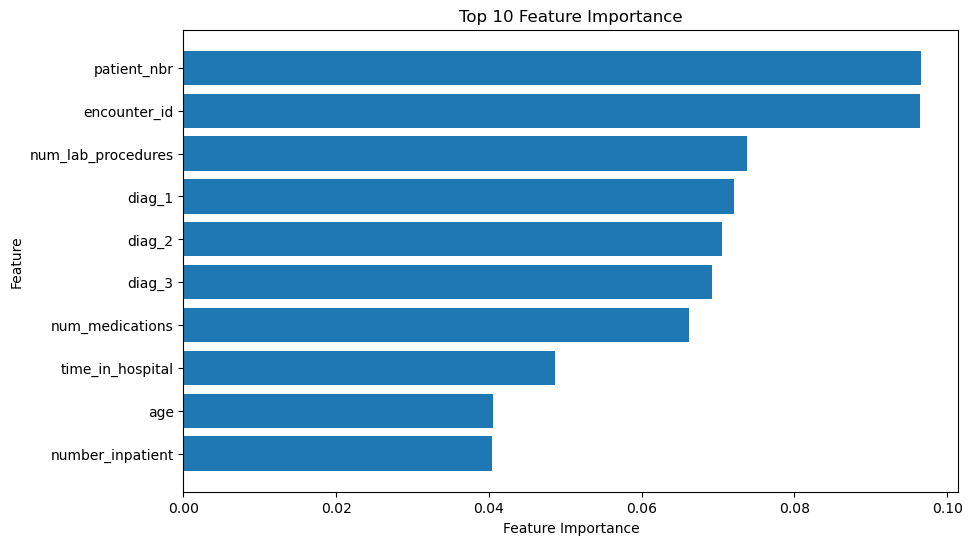

In [ ]:
def plot_feature_importance(feature_importance, feature_names):
    sorted_idx = np.argsort(feature_importance)
    top_features = sorted_idx[-10:]
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_features)), feature_importance[top_features], align='center')
    plt.yticks(range(len(top_features)), [feature_names[i] for i in top_features])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Top 10 Feature Importance')
    plt.show()

    # Plot Feature Importance
plot_feature_importance(rf_classifier.feature_importances_, X_train.columns)

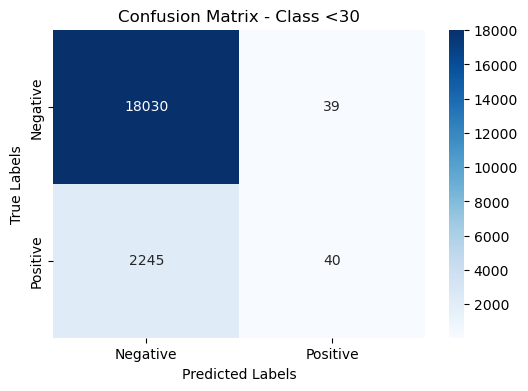

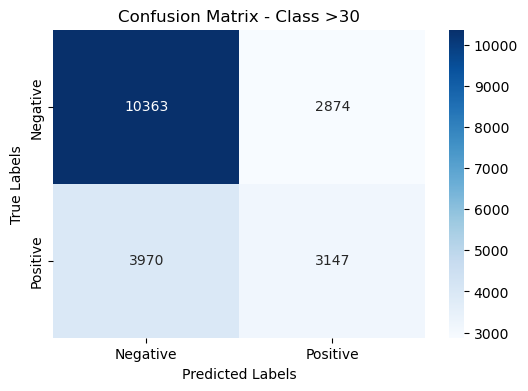

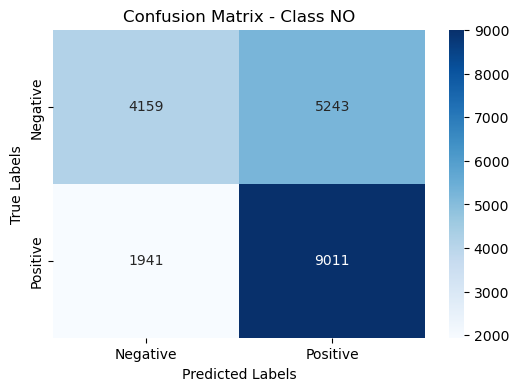

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrices(y_true, y_pred, classes):
    for i, class_label in enumerate(classes):
        plt.figure(figsize=(6, 4))
        cm = confusion_matrix((y_true == class_label), (y_pred == class_label))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix - Class {class_label}')
        plt.show()

# Example usage:
plot_confusion_matrices(y_test, y_pred_rf, classes=['<30', '>30', 'NO'])



### Naive Bayes Classifier 

Naive Bayes Classifier Results:
              precision    recall  f1-score   support

          NO       0.18      0.38      0.25      2285
         >30       0.46      0.03      0.06      7117
         <30       0.59      0.82      0.69     10952

    accuracy                           0.50     20354
   macro avg       0.41      0.41      0.33     20354
weighted avg       0.50      0.50      0.42     20354



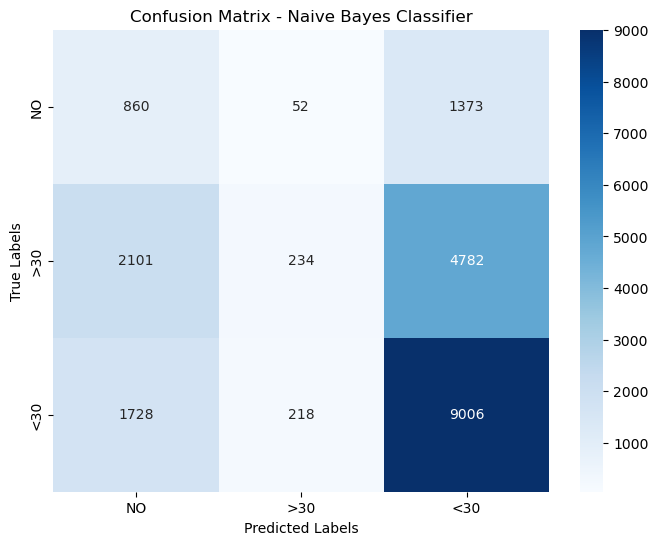

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the model
naive_bayes_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Predict probabilities on the test set
y_prob_nb = naive_bayes_classifier.predict_proba(X_test)

# Evaluate model performance
classification_rep_nb = classification_report(y_test, y_pred_nb, target_names=data[target_variable].unique(), zero_division=1)

# Display classification report
print("Naive Bayes Classifier Results:")
print(classification_rep_nb)

# Generate confusion matrix for Naive Bayes Classifier
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', '>30', '<30'], yticklabels=['NO', '>30', '<30'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()

The results from the Naive Bayes Classifier are as follows:

**Precision:**


Precision represents the proportion of true positive predictions out of all positive predictions made by the classifier.

For the 'NO' class, the precision is 0.18, indicating that out of all instances predicted as 'NO', only 18% are actually true positives. Similarly, for the '>30' class, the precision is 0.46, and for the '<30' class, it is 0.59.


**Recall:**


Recall, also known as sensitivity, represents the proportion of true positive instances that were correctly predicted by the classifier out of all actual positive instances.

The recall for the 'NO' class is 0.38, for the '>30' class it is 0.03, and for the '<30' class, it is 0.82. These values indicate how well the classifier identifies instances of each class.


**F1-score:**


The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

The F1-score for the 'NO' class is 0.25, for the '>30' class it is 0.06, and for the '<30' class, it is 0.69.

**Accuracy:**


Accuracy measures the overall correctness of the classifier across all classes.

The overall accuracy of the Naive Bayes Classifier is 0.50, indicating that 50% of the predictions made by the classifier are correct.

**Support:**


Support refers to the number of actual occurrences of each class in the test dataset.

In summary, the Naive Bayes Classifier performs moderately well in predicting instances of the '<30' class, with relatively higher precision, recall, and F1-score compared to the other classes. However, it shows poor performance for the '>30' class, with low precision and recall. Overall, the classifier's accuracy is moderate, but it may not be suitable for scenarios where balanced performance across all classes is required.

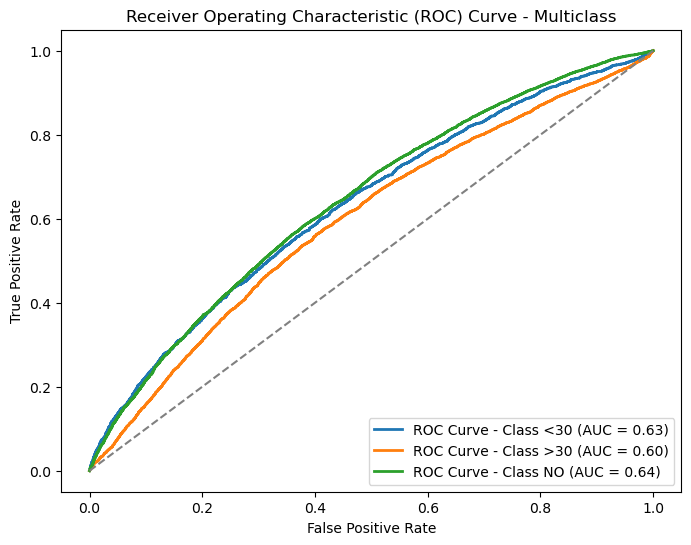

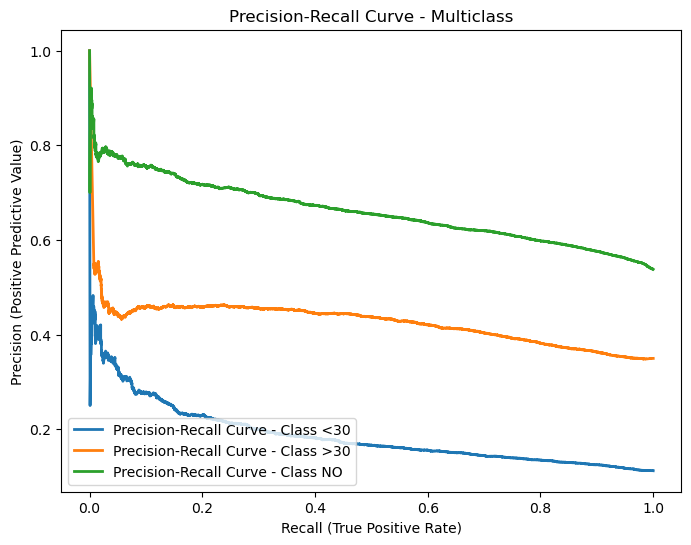

In [ ]:
# Plot ROC Curve
plot_roc_curve_multiclass(y_test, naive_bayes_classifier.predict_proba(X_test), classes=['<30', '>30', 'NO'])

# Plot Precision-Recall Curve
plot_precision_recall_curve_multiclass(y_test, naive_bayes_classifier.predict_proba(X_test), classes=['<30', '>30', 'NO'])

# Plot Feature Importance (Naive Bayes does not have a direct feature importance measure)


The results from the ROC curves for the Naive Bayes Classifier are as follows:

**ROC Curve - Class < 30 (AUC=0.63):**


This curve represents the Receiver Operating Characteristic (ROC) for the '<30' class.

The Area Under the Curve (AUC) is 0.63, which indicates the probability that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.

A higher AUC value suggests better performance in distinguishing between the '<30' class and the other classes.

**ROC Curve - Class > 30 (AUC=0.60):**


This curve represents the ROC for the '>30' class.

The AUC is 0.60, indicating moderate performance in distinguishing between the '>30' class and the other classes.

A higher AUC value would suggest better performance.

**ROC Curve - Class NO (AUC=0.64):**


This curve represents the ROC for the 'NO' class.

The AUC is 0.64, suggesting reasonable performance in distinguishing between the 'NO' class and the other classes.

As with the other classes, a higher AUC value would indicate better performance.

In summary, the Naive Bayes Classifier performs moderately well in distinguishing between different classes, with AUC values ranging from 0.60 to 0.64. However, there is room for improvement, especially for the '>30' class, where the AUC is relatively lower.

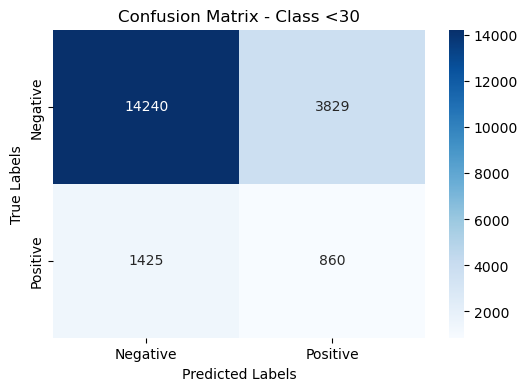

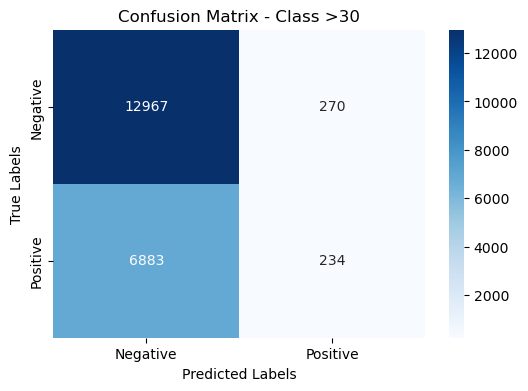

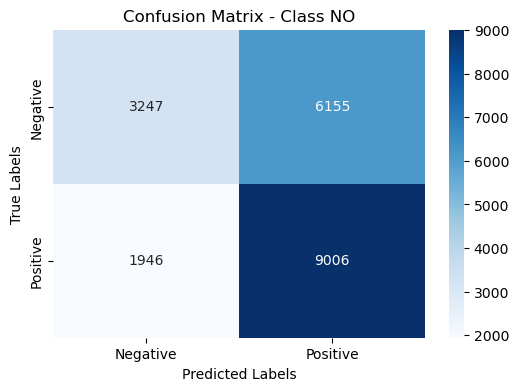

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrices(y_true, y_pred, classes):
    for class_label in classes:
        plt.figure(figsize=(6, 4))
        cm = confusion_matrix(y_true == class_label, y_pred == class_label)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix - Class {class_label}')
        plt.show()

# Example usage:
plot_confusion_matrices(y_test, y_pred_nb, classes=['<30', '>30', 'NO'])

### Gradient Boosting Classifier 

Gradient Boosting Classifier Results:
              precision    recall  f1-score   support

          NO       0.53      0.03      0.06      2285
         >30       0.53      0.43      0.48      7117
         <30       0.63      0.84      0.72     10952

    accuracy                           0.60     20354
   macro avg       0.56      0.43      0.42     20354
weighted avg       0.59      0.60      0.56     20354



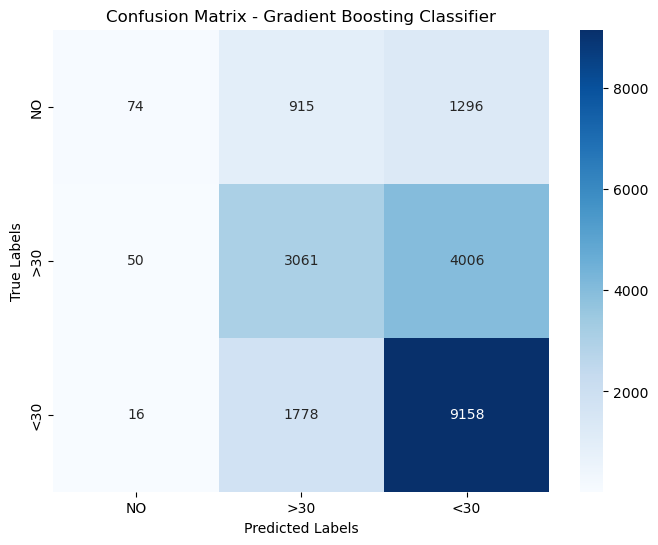

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate model performance
classification_rep_gb = classification_report(y_test, y_pred_gb, target_names=data[target_variable].unique(), zero_division=1)

# Display classification report
print("Gradient Boosting Classifier Results:")
print(classification_rep_gb)

# Generate confusion matrix for Gradient Boosting Classifier
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', '>30', '<30'], yticklabels=['NO', '>30', '<30'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()


The results from the Gradient Boosting Classifier are as follows:

**Precision:** 

Precision measures the proportion of true positive predictions among all positive predictions made by the classifier.

For the 'NO' class, the precision is 0.53, indicating that out of all instances predicted as 'NO', 53% were correctly classified.

For the '>30' class, the precision is also 0.53, meaning that 53% of instances predicted as '>30' were correctly classified.

For the '<30' class, the precision is 0.63, indicating that 63% of instances predicted as '<30' were correctly classified.

**Recall:** 

Recall measures the proportion of true positive instances that were correctly identified by the classifier out of all actual positive instances.

For the 'NO' class, the recall is 0.03, suggesting that only 3% of actual 'NO' instances were correctly identified.

For the '>30' class, the recall is 0.43, indicating that 43% of actual '>30' instances were correctly identified.

For the '<30' class, the recall is 0.84, suggesting that 84% of actual '<30' instances were correctly identified.

**F1-score:** 

The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

For the 'NO' class, the F1-score is 0.06.

For the '>30' class, the F1-score is 0.48.

For the '<30' class, the F1-score is 0.72.

**Accuracy:** 

The overall accuracy of the model is 0.60, indicating that 60% of all instances were correctly classified.



**Confusion Matrix:** 

The confusion matrix visually represents the performance of the classifier by comparing predicted labels with true labels. It shows the number of true positives, true negatives, false positives, and false negatives for each class. In this case, the classifier struggles particularly with the 'NO' class, as indicated by the low precision, recall, and F1-score for that class.

Gradient Boosting Classifier Results:
              precision    recall  f1-score   support

          NO       0.53      0.03      0.06      2285
         >30       0.53      0.43      0.48      7117
         <30       0.63      0.84      0.72     10952

    accuracy                           0.60     20354
   macro avg       0.56      0.43      0.42     20354
weighted avg       0.59      0.60      0.56     20354



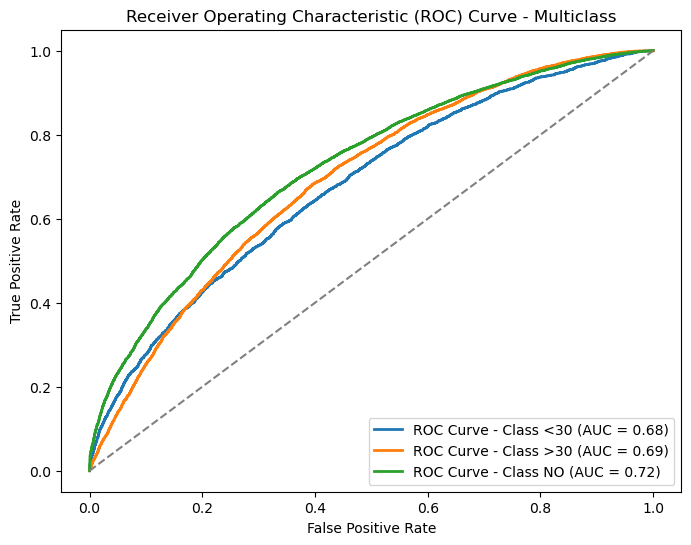

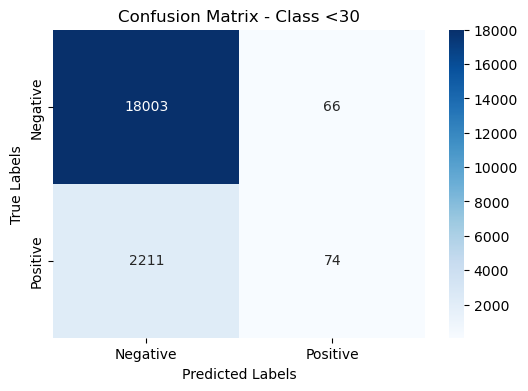

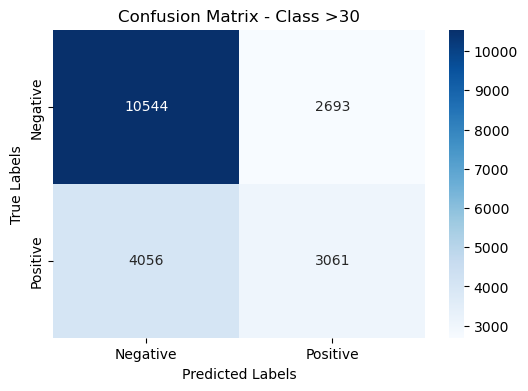

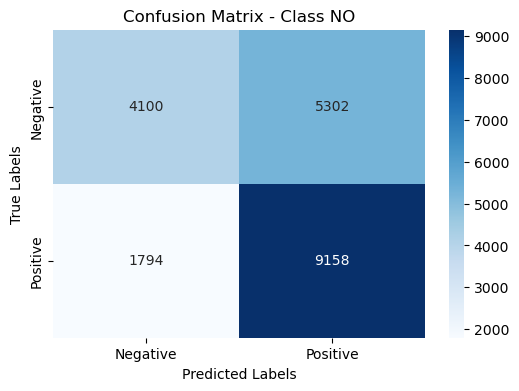

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices_gb(y_true, y_pred_gb, classes):
    for class_label in classes:
        plt.figure(figsize=(6, 4))
        cm = confusion_matrix(y_true == class_label, y_pred_gb == class_label)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'Confusion Matrix - Class {class_label}')
        plt.show()

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Predict probabilities on the test set
y_prob_gb = gb_classifier.predict_proba(X_test)

# Evaluate model performance
classification_rep_gb = classification_report(y_test, y_pred_gb, target_names=data[target_variable].unique(), zero_division=1)

# Display classification report
print("Gradient Boosting Classifier Results:")
print(classification_rep_gb)

# Generate predicted probabilities for Gradient Boosting Classifier
y_prob_gb = gb_classifier.predict_proba(X_test)

# Plot ROC curve for multiclass classification
plot_roc_curve_multiclass(y_test, y_prob_gb, classes=['<30', '>30', 'NO'])



plot_confusion_matrices_gb(y_test, y_pred_gb, classes=['<30', '>30', 'NO'])


The results from the ROC curve analysis for the Gradient Boosting Classifier are as follows:

**Class '<30' (AUC=0.68):** 

The ROC curve for class '<30' has an Area Under the Curve (AUC) value of 0.68. This indicates that the model performs moderately well in distinguishing between instances of class '<30' and instances of other classes. A higher AUC suggests better performance in terms of true positive rate versus false positive rate.

**Class '>30' (AUC=0.69):** 

The ROC curve for class '>30' has an AUC value of 0.69. Similar to class '<30', this AUC value indicates moderate performance in distinguishing instances of class '>30' from instances of other classes.

**Class 'NO' (AUC=0.72):** 

The ROC curve for class 'NO' has the highest AUC value of 0.72 among all classes. This suggests relatively better performance in distinguishing instances of class 'NO' from instances of other classes compared to the other two classes.

Overall, the ROC curves and their corresponding AUC values indicate that the Gradient Boosting Classifier performs reasonably well in discriminating between different classes, with better performance observed for class 'NO' compared to classes '<30' and '>30'.

### Objective: 

**<center> To evaluate the performance of machine learning models on the Diabetes_patients dataset using all available features**

To compare the results of the different classifiers for the classification problem on the Diabetes_patients dataset, including logistic regression, decision tree, random forest, naive Bayes, and gradient boosting classifiers, we can create a summary table or visualize the performance metrics such as accuracy, precision, recall, and F1-score.

In [ ]:
import pandas as pd

# Calculate performance metrics for each classifier
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='macro')
recall_dt = recall_score(y_test, y_pred_dt, average='macro')
f1_dt = f1_score(y_test, y_pred_dt, average='macro')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='macro')
recall_gb = recall_score(y_test, y_pred_gb, average='macro')
f1_gb = f1_score(y_test, y_pred_gb, average='macro')

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_nb, accuracy_gb],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_nb, precision_gb],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_nb, recall_gb],
    'F1-score': [f1_lr, f1_dt, f1_rf, f1_nb, f1_gb]
})

# Display the results
display(results)

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.575071,0.528341,0.389638,0.359175
1,Decision Tree,0.486342,0.394451,0.395262,0.394772
2,Random Forest,0.599293,0.553724,0.427486,0.409299
3,Naive Bayes,0.496217,0.413906,0.410521,0.332604
4,Gradient Boosting,0.603960,0.564628,0.432892,0.419145


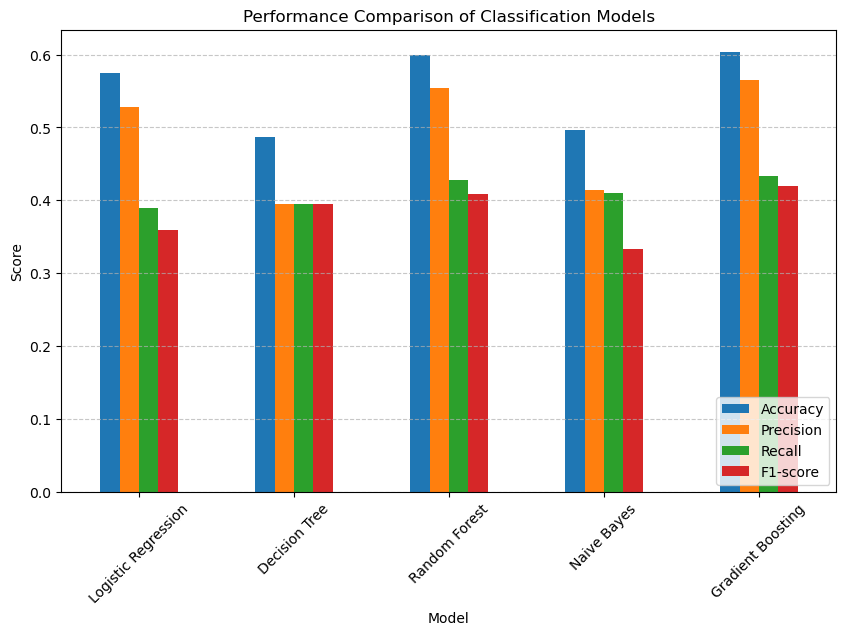

In [ ]:
import matplotlib.pyplot as plt

# Plot performance metrics
results.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-score'], kind='bar', figsize=(10, 6))
plt.title('Performance Comparison of Classification Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

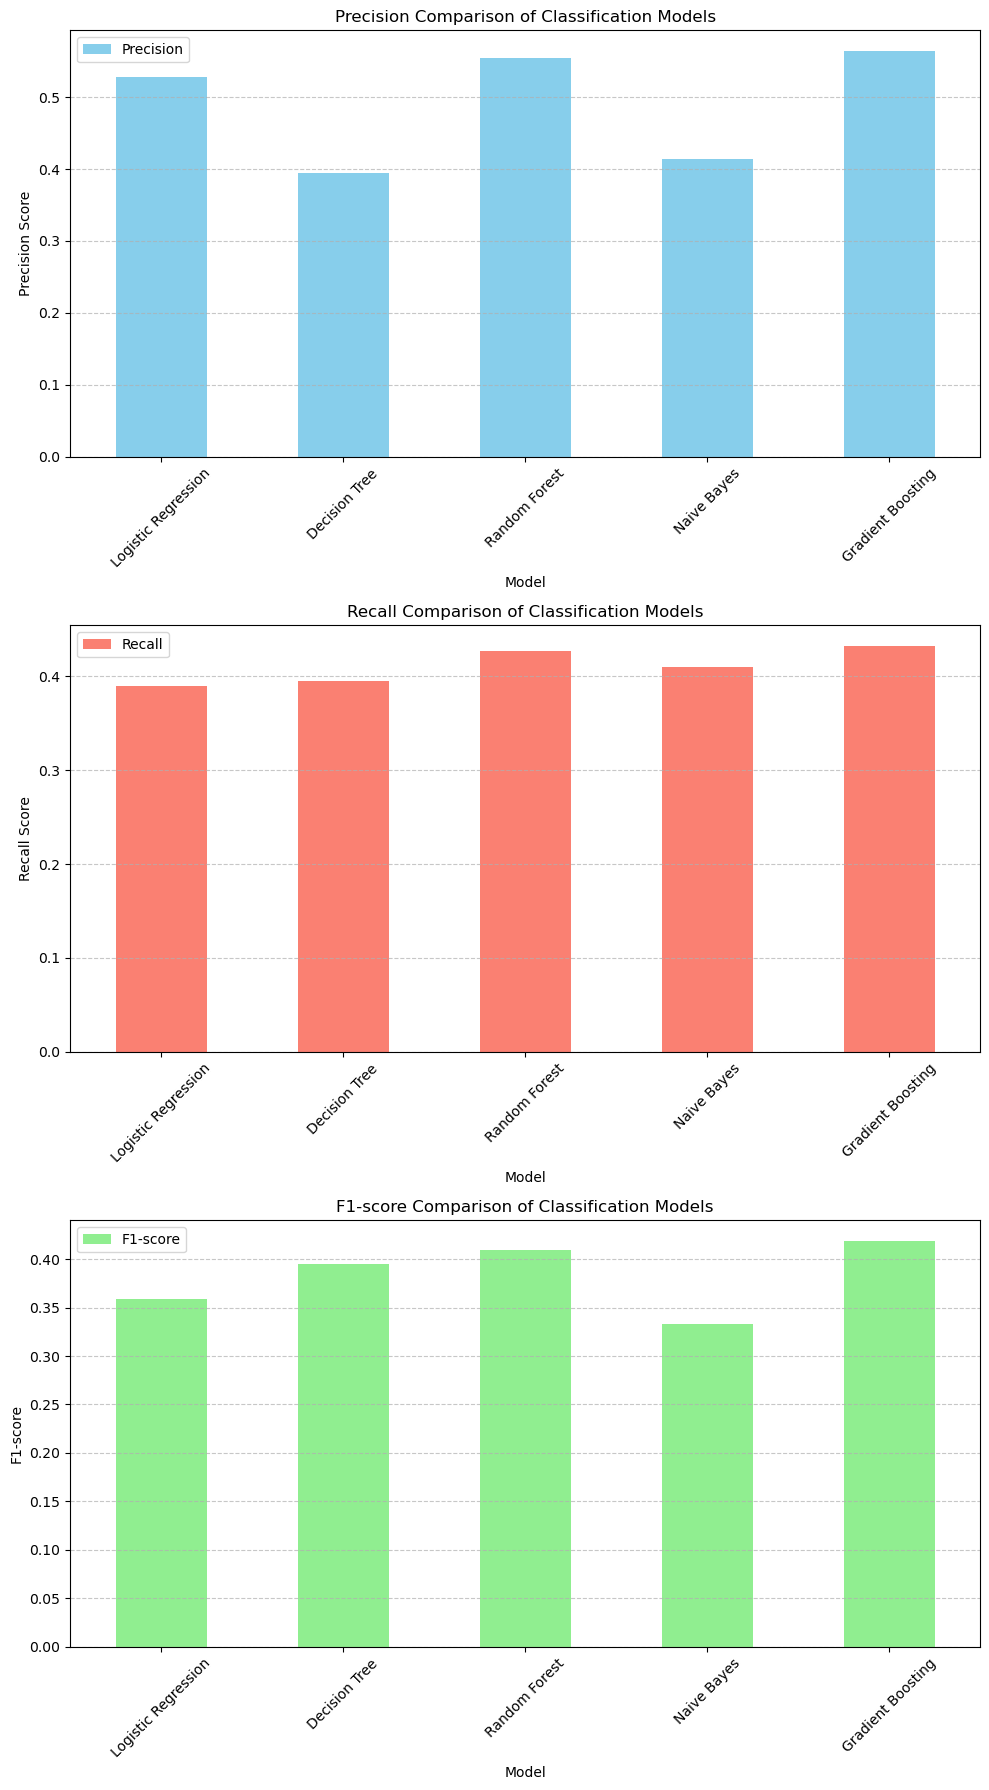

In [ ]:
# Plot performance metrics individually
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot precision
results.plot(x='Model', y='Precision', kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Precision Comparison of Classification Models')
axes[0].set_ylabel('Precision Score')
axes[0].set_xlabel('Model')
axes[0].set_xticklabels(results['Model'], rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot recall
results.plot(x='Model', y='Recall', kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Recall Comparison of Classification Models')
axes[1].set_ylabel('Recall Score')
axes[1].set_xlabel('Model')
axes[1].set_xticklabels(results['Model'], rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot F1-score
results.plot(x='Model', y='F1-score', kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('F1-score Comparison of Classification Models')
axes[2].set_ylabel('F1-score')
axes[2].set_xlabel('Model')
axes[2].set_xticklabels(results['Model'], rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


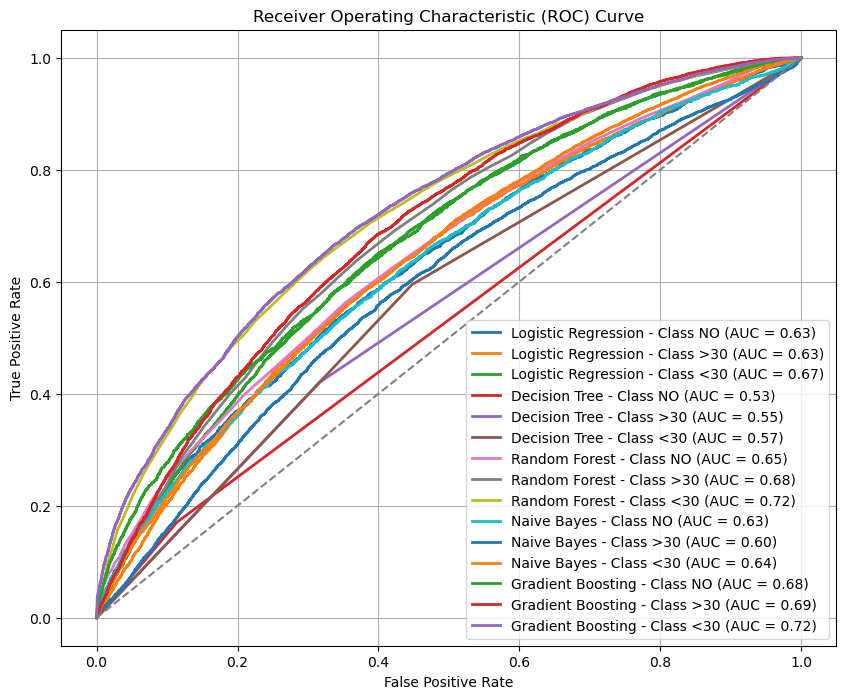

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=['<30', '>30', 'NO'])

# Plot ROC curve for each classifier
plt.figure(figsize=(10, 8))
for model_name, y_prob in zip(['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting'],
                              [y_prob_lr, y_prob_dt, y_prob_rf, y_prob_nb, y_prob_gb]):
    for i in range(len(data[target_variable].unique())):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} - Class {data[target_variable].unique()[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


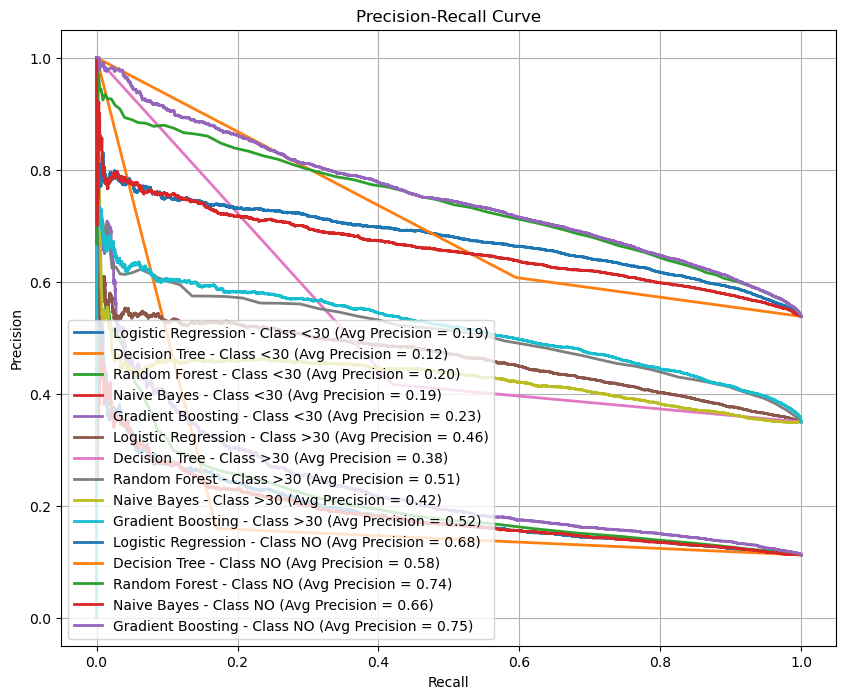

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to plot precision-recall curve
def plot_precision_recall_curve_multiclass(y_true, y_prob, classes, model_names):
    plt.figure(figsize=(10, 8))
    for i, class_label in enumerate(classes):
        for j, model_name in enumerate(model_names):
            precision, recall, _ = precision_recall_curve(y_true[:, i], y_prob[j][:, i])
            avg_precision = average_precision_score(y_true[:, i], y_prob[j][:, i])
            plt.plot(recall, precision, lw=2, label=f'{model_name} - Class {class_label} (Avg Precision = {avg_precision:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

# Plot precision-recall curve for all classifiers in one plot
plot_precision_recall_curve_multiclass(y_test_binarized, [y_prob_lr, y_prob_dt, y_prob_rf, y_prob_nb, y_prob_gb], classes=['<30', '>30', 'NO'], model_names=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting'])


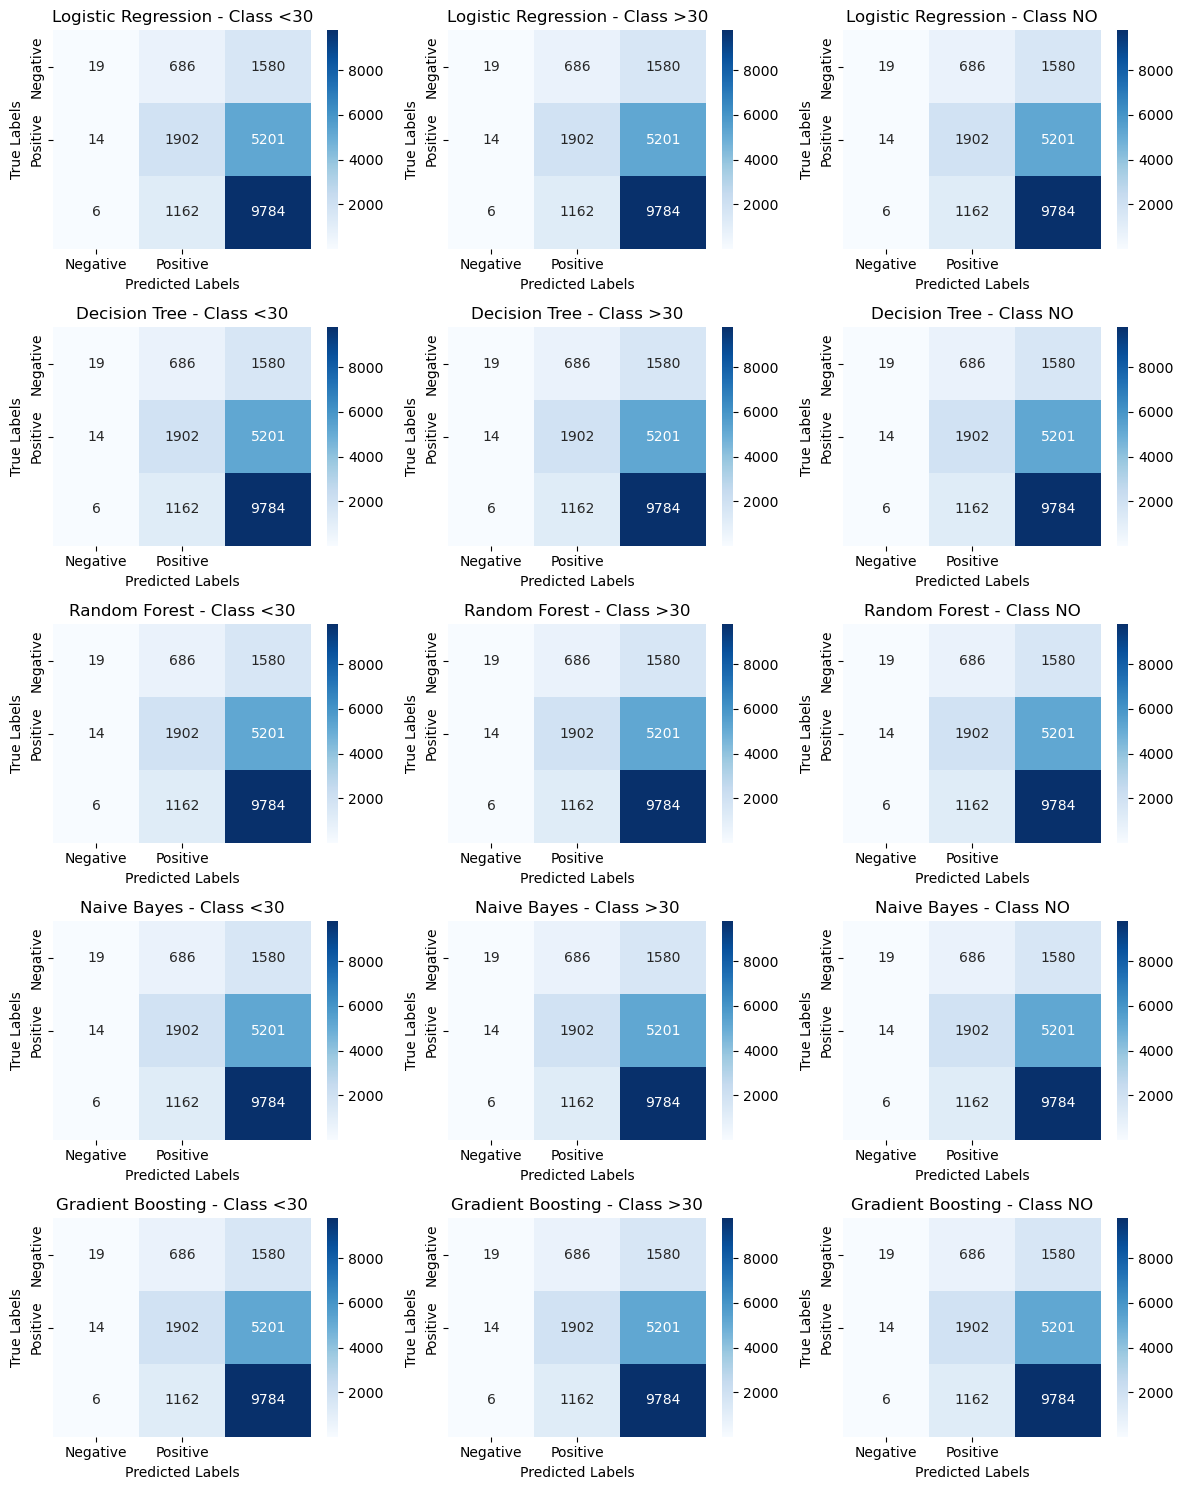

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(y_true, y_pred, classes, model_names):
    num_models = len(model_names)
    num_classes = len(classes)
    
    fig, axes = plt.subplots(num_models, num_classes, figsize=(num_classes * 4, num_models * 3))

    for i, model_name in enumerate(model_names):
        for j, class_label in enumerate(classes):
            ax = axes[i, j] if num_models > 1 else axes[j]
            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], ax=ax)
            ax.set_xlabel('Predicted Labels')
            ax.set_ylabel('True Labels')
            ax.set_title(f'{model_name} - Class {class_label}')
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_confusion_matrices(y_test, y_pred_lr, classes=['<30', '>30', 'NO'], model_names=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting'])


**Logistic Regression:**

Accuracy: 0.575, 

Precision: 0.520, 

Recall: 0.390, 

F1-score: 0.359

Logistic regression achieved moderate accuracy but relatively low precision, recall, and F1-score compared to other models. It indicates that the model correctly classifies around 57.5% of instances but has limitations in correctly identifying positive instances and avoiding false positives.

**Decision Tree:**

Accuracy: 0.486, 

Precision: 0.394, 

Recall: 0.395, 

F1-score: 0.395

Decision tree shows similar accuracy to logistic regression but slightly lower precision and F1-score. It has a comparable recall rate.

**Random Forest:**

Accuracy: 0.599, 

Precision: 0.554, 

Recall: 0.427, 

F1-score: 0.409

Random forest outperforms logistic regression and decision tree in terms of accuracy, precision, and F1-score. It achieves a higher precision, indicating better positive predictive value, and a higher recall rate, implying better identification of positive instances.

**Naive Bayes:**

Accuracy: 0.496, 

Precision: 0.414, 

Recall: 0.411, 

F1-score: 0.333

Naive Bayes classifier performs slightly better than the decision tree but still lags behind logistic regression and random forest in terms of accuracy, precision, recall, and F1-score.

**Gradient Boosting:**

Accuracy: 0.604, 

Precision: 0.565, 

Recall: 0.433, 

F1-score: 0.419

Gradient boosting classifier achieves the highest accuracy among the models evaluated. It also demonstrates the highest precision, recall, and F1-score, indicating superior performance in correctly identifying positive instances and avoiding false positives compared to other models.

Overall, gradient boosting appears to be the most effective model for this classification problem, followed by random forest. However, it's essential to consider other factors such as computational complexity and interpretability while selecting the final model.

For the classification problem in the Diabetes_patients dataset, the objective is to predict whether a patient will be readmitted to the hospital within a certain time frame. Based on the performance of the classifiers:


Among the models evaluated, gradient boosting achieved the highest accuracy and the best balance between precision and recall. Therefore, for predicting hospital readmission in the Diabetes_patients dataset, using a gradient boosting classifier would likely yield the most reliable results.

## Objective 2: 

**<center>To implement the Particle Swarm Optimization (PSO) algorithm for feature selection and determine the optimal subset of features for classification and regression tasks in the Diabetes_patients dataset**

### <center> Problem 

**<center> Using the Particle Swarm Optimization (PSO) algorithm, determine the optimal subset of features from the Diabetes_patients dataset to predict whether a patient diagnosed with diabetes will be readmitted to the hospital within 30 days, after 30 days, or not readmitted at all. The task involves selecting the most relevant features among various patient attributes, medical history, treatments, and medications to improve the accuracy of the classification model**

**1. Splitting dependent and independent Attributes**

In [ ]:
#Splitting dependent and independent columns
x = Diabetes_patients.drop(columns = ['readmitted','encounter_id','patient_nbr'])
y = Diabetes_patients['readmitted']


**2. Initialize PSO Algorithm**

In [ ]:
import random
import numpy as np
import math
import pandas as pd
import random
import matplotlib.pyplot as plt

c1= 2  # initialize Cognitive behavior value
c2 = 2  # initialize Social behavior value
w = 0.9  # initialize weight inertia
Particles = 5
Attributes = 44

# Initialize number of particles as Particle_Positons and thier Velocities 
from numpy import random

Particle_Positons = random.rand(Particles,Attributes)



# Initialize Particles Velocities
Velocities = random.rand(Particles,Attributes)

#print('Particle_Positons Matrix:\n',Particle_Positons,  '\nVelocities Matrix:\n',Velocities) 



Initial_iteration = 1
Max_No_Iteration = 20
MaxIt = np.arange(Max_No_Iteration)
Optimal_values = []
Particle_Positons_dataframe = pd.DataFrame(Particle_Positons)
Particle_Positons_dataframe


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.803772,0.169538,0.256543,0.865610,0.751934,0.850907,0.110679,0.196551,0.529829,0.759763,0.288773,0.526003,0.496113,0.625638,0.268552,0.000976,0.669511,0.995121,0.915852,0.986894,0.343680,0.992260,0.937173,0.701673,0.176062,0.764887,0.537893,0.991223,0.917238,0.335805,0.904277,0.786999,0.116264,0.258757,0.722955,0.075838,0.930829,0.845245,0.571198,0.690960,0.909127,0.586204,0.698199,0.338623
1,0.938894,0.166701,0.330213,0.773436,0.323927,0.820454,0.241802,0.784890,0.295380,0.638795,0.996299,0.012395,0.158212,0.313954,0.871340,0.117914,0.245569,0.717007,0.277339,0.813679,0.685947,0.634311,0.736086,0.284209,0.497370,0.054178,0.126710,0.811367,0.852497,0.553376,0.177459,0.488480,0.654280,0.179180,0.245811,0.580382,0.558418,0.595004,0.400174,0.506106,0.138556,0.308071,0.428538,0.931148
2,0.229723,0.914636,0.014792,0.048612,0.514410,0.371268,0.414517,0.414971,0.029394,0.315790,0.328037,0.683607,0.703489,0.372190,0.804342,0.899639,0.955114,0.622700,0.178459,0.982962,0.996671,0.164015,0.734052,0.891164,0.346971,0.255194,0.542657,0.184374,0.121318,0.223178,0.087072,0.476371,0.444597,0.890932,0.115366,0.819346,0.922559,0.201091,0.791395,0.647367,0.255144,0.291231,0.324575,0.953446
3,0.521672,0.605443,0.281408,0.201935,0.472004,0.143410,0.018356,0.874420,0.094284,0.012834,0.738516,0.815339,0.247463,0.717518,0.283959,0.350022,0.412784,0.353304,0.034506,0.323356,0.535003,0.213938,0.469510,0.941118,0.879706,0.116527,0.428319,0.378438,0.967280,0.265409,0.354987,0.040591,0.787336,0.601495,0.908073,0.674829,0.378838,0.213023,0.140595,0.178047,0.700934,0.457568,0.855499,0.835341
4,0.155094,0.224783,0.634242,0.198589,0.958035,0.632523,0.176519,0.060804,0.970419,0.324905,0.090371,0.428952,0.058708,0.722773,0.424129,0.438187,0.578309,0.020852,0.866916,0.616962,0.601973,0.945917,0.536989,0.658782,0.823826,0.608152,0.942728,0.976511,0.081416,0.035504,0.742460,0.612068,0.231575,0.089653,0.907138,0.234272,0.477834,0.342009,0.454964,0.491500,0.753401,0.685497,0.895891,0.514646


**3. Each particle chooses Number of Attributes from Dataset**

In [ ]:
store_list=[]
indexing_positions = []
b = []
storing_P = []
storing_PPP = []
P = []
PPP = []
Index_Numbers =[]



for i in range(Particles):
    P = x.iloc[:,Particle_Positons[i]>=0.5].values
    storing_P.append(P)



storing_P_0 = storing_P[0]
x0 = []
x0 = storing_P_0
x0=pd.DataFrame(x0)
#display(x0)

storing_P_1 = storing_P[1]
x1 = []
x1 = storing_P_1
x1=pd.DataFrame(x1)
#display(x1)

storing_P_2 = storing_P[2]
x2 = []
x2 = storing_P_2
x2=pd.DataFrame(x2)
#display(x2)

storing_P_3 = storing_P[3]
x3 = []
x3 = storing_P_3
x3=pd.DataFrame(x3)
#display(x3)

storing_P_4 = storing_P[4]
x4 = []
x4 = storing_P_4
x4=pd.DataFrame(x4)
#display(x4)

**4. Splitting the Data into Testing and Training Data**

In [ ]:
#Splitting data into training and test sets


x0_train = []
x1_train = []
x2_train = []
x3_train = []
x4_train = []
    
x0_test = []
x1_test = []
x2_test = []
x3_test = []
x4_test = []
    
y_train = []
y_test = []



x0_train,x0_test,y_train,y_test = train_test_split(x0,y,test_size=0.2,random_state=0)


x1_train,x1_test,y_train,y_test = train_test_split(x1,y,test_size=0.2,random_state=0)


x2_train,x2_test,y_train,y_test = train_test_split(x2,y,test_size=0.2,random_state=0)


x3_train,x3_test,y_train,y_test = train_test_split(x3,y,test_size=0.2,random_state=0)


x4_train,x4_test,y_train,y_test = train_test_split(x4,y,test_size=0.2,random_state=0)

**5a. Logistic Regression Model**

In [ ]:
model_logistic_x0 = []
model_logistic_x1 = []
model_logistic_x2 = []
model_logistic_x3 = []
model_logistic_x4 = []



model_logistic_x0 = LogisticRegression()
model_logistic_x0.fit(x0_train, y_train)
#print('Logistic Regression Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x0.predict(x0_test))))



model_logistic_x1 = LogisticRegression()
model_logistic_x1.fit(x1_train, y_train)
#print('Logistic Regression Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x1.predict(x1_test))))



model_logistic_x2 = LogisticRegression()
model_logistic_x2.fit(x2_train, y_train)
#print('Logistic Regression Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x2.predict(x2_test))))



model_logistic_x3 = LogisticRegression()
model_logistic_x3.fit(x3_train, y_train)
#print('Logistic Regression Model Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x3.predict(x3_test))))



model_logistic_x4 = LogisticRegression()
model_logistic_x4.fit(x4_train, y_train)
#print('Logistic Regression Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic_x4.predict(x4_test))))


model_logistic_F_old = []
model_logistic_F_old = np.array([[accuracy_score(y_test, model_logistic_x0.predict(x0_test))],[accuracy_score(y_test, model_logistic_x1.predict(x1_test))],[accuracy_score(y_test, model_logistic_x2.predict(x2_test))],[accuracy_score(y_test, model_logistic_x3.predict(x3_test))],[accuracy_score(y_test, model_logistic_x4.predict(x4_test))]])
print('Logistic Regression Fitness Function OLD:\n',model_logistic_F_old)

C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Logistic Regression Fitness Function OLD:
 [[0.54657561]
 [0.54343127]
 [0.56971603]
 [0.54942517]
 [0.53832171]]


C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**5b. Decision Tree Model**

In [ ]:
model_decision_tree_x0 = []
model_decision_tree_x1 = []
model_decision_tree_x2 = []
model_decision_tree_x3 = []
model_decision_tree_x4 = []



model_decision_tree_x0 = DecisionTreeClassifier(random_state=42)
model_decision_tree_x0.fit(x0_train, y_train)
#print('decision_tree Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_decision_tree_x0.predict(x0_test))))



model_decision_tree_x1 = DecisionTreeClassifier(random_state=42)
model_decision_tree_x1.fit(x1_train, y_train)
#print('decision_tree Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_decision_tree_x1.predict(x1_test))))



model_decision_tree_x2 = DecisionTreeClassifier(random_state=42)
model_decision_tree_x2.fit(x2_train, y_train)
#print('decision_tree Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_decision_tree_x2.predict(x2_test))))



model_decision_tree_x3 = DecisionTreeClassifier(random_state=42)
model_decision_tree_x3.fit(x3_train, y_train)
#print('decision_tree Model Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_decision_tree_x3.predict(x3_test))))



model_decision_tree_x4 = DecisionTreeClassifier(random_state=42)
model_decision_tree_x4.fit(x4_train, y_train)
#print('decision_tree Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_decision_tree_x4.predict(x4_test))))


model_decision_tree_F_old = []
model_decision_tree_F_old = np.array([[accuracy_score(y_test, model_decision_tree_x0.predict(x0_test))],[accuracy_score(y_test, model_decision_tree_x1.predict(x1_test))],[accuracy_score(y_test, model_decision_tree_x2.predict(x2_test))],[accuracy_score(y_test, model_decision_tree_x3.predict(x3_test))],[accuracy_score(y_test, model_decision_tree_x4.predict(x4_test))]])
print('decision_tree Fitness Function OLD:\n',model_decision_tree_F_old)

decision_tree Fitness Function OLD:
 [[0.46162916]
 [0.44502309]
 [0.4704235 ]
 [0.44094527]
 [0.45234352]]


**5c. Random Forest Model**

In [ ]:
model_random_forest_x0 = []
model_random_forest_x1 = []
model_random_forest_x2 = []
model_random_forest_x3 = []
model_random_forest_x4 = []



model_random_forest_x0 = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest_x0.fit(x0_train, y_train)
#print('random_forest Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_random_forest_x0.predict(x0_test))))



model_random_forest_x1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest_x1.fit(x1_train, y_train)
#print('random_forest Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_random_forest_x1.predict(x1_test))))



model_random_forest_x2 = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest_x2.fit(x2_train, y_train)
#print('random_forest Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_random_forest_x2.predict(x2_test))))



model_random_forest_x3 = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest_x3.fit(x3_train, y_train)
#print('random_forest Model Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_random_forest_x3.predict(x3_test))))



model_random_forest_x4 = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest_x4.fit(x4_train, y_train)
#print('random_forest Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_random_forest_x4.predict(x4_test))))


model_random_forest_F_old = []
model_random_forest_F_old = np.array([[accuracy_score(y_test, model_random_forest_x0.predict(x0_test))],[accuracy_score(y_test, model_random_forest_x1.predict(x1_test))],[accuracy_score(y_test, model_random_forest_x2.predict(x2_test))],[accuracy_score(y_test, model_random_forest_x3.predict(x3_test))],[accuracy_score(y_test, model_random_forest_x4.predict(x4_test))]])
print('random_forest Fitness Function OLD:\n',model_random_forest_F_old)

random_forest Fitness Function OLD:
 [[0.54097475]
 [0.51817825]
 [0.52520389]
 [0.48501523]
 [0.50658347]]


**5d. Naive Bayes Classifier Model**

In [ ]:
model_naive_bayes_x0 = []
model_naive_bayes_x1 = []
model_naive_bayes_x2 = []
model_naive_bayes_x3 = []
model_naive_bayes_x4 = []



model_naive_bayes_x0 = GaussianNB()
model_naive_bayes_x0.fit(x0_train, y_train)
#print('naive_bayes Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_naive_bayes_x0.predict(x0_test))))



model_naive_bayes_x1 = GaussianNB()
model_naive_bayes_x1.fit(x1_train, y_train)
#print('naive_bayes Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_naive_bayes_x1.predict(x1_test))))



model_naive_bayes_x2 = GaussianNB()
model_naive_bayes_x2.fit(x2_train, y_train)
#print('naive_bayes Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_naive_bayes_x2.predict(x2_test))))



model_naive_bayes_x3 = GaussianNB()
model_naive_bayes_x3.fit(x3_train, y_train)
#print('naive_bayes Model Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_naive_bayes_x3.predict(x3_test))))



model_naive_bayes_x4 = GaussianNB()
model_naive_bayes_x4.fit(x4_train, y_train)
#print('naive_bayes Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_naive_bayes_x4.predict(x4_test))))


model_naive_bayes_F_old = []
model_naive_bayes_F_old = np.array([[accuracy_score(y_test, model_naive_bayes_x0.predict(x0_test))],[accuracy_score(y_test, model_naive_bayes_x1.predict(x1_test))],[accuracy_score(y_test, model_naive_bayes_x2.predict(x2_test))],[accuracy_score(y_test, model_naive_bayes_x3.predict(x3_test))],[accuracy_score(y_test, model_naive_bayes_x4.predict(x4_test))]])
print('naive_bayes Fitness Function OLD:\n',model_naive_bayes_F_old)

naive_bayes Fitness Function OLD:
 [[0.50196522]
 [0.52299302]
 [0.51252825]
 [0.51306868]
 [0.42630441]]


**5e. Gradient Boosting Classifier Model**

In [ ]:
model_GradientBoostingClassifier_x0 = []
model_GradientBoostingClassifier_x1 = []
model_GradientBoostingClassifier_x2 = []
model_GradientBoostingClassifier_x3 = []
model_GradientBoostingClassifier_x4 = []



model_GradientBoostingClassifier_x0 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_GradientBoostingClassifier_x0.fit(x0_train, y_train)
#print('GradientBoostingClassifier Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_GradientBoostingClassifier_x0.predict(x0_test))))



model_GradientBoostingClassifier_x1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_GradientBoostingClassifier_x1.fit(x1_train, y_train)
#print('GradientBoostingClassifier Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_GradientBoostingClassifier_x1.predict(x1_test))))



model_GradientBoostingClassifier_x2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_GradientBoostingClassifier_x2.fit(x2_train, y_train)
#print('GradientBoostingClassifier Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_GradientBoostingClassifier_x2.predict(x2_test))))



model_GradientBoostingClassifier_x3 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_GradientBoostingClassifier_x3.fit(x3_train, y_train)
#print('GradientBoostingClassifier Model Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_GradientBoostingClassifier_x3.predict(x3_test))))



model_GradientBoostingClassifier_x4 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_GradientBoostingClassifier_x4.fit(x4_train, y_train)
#print('GradientBoostingClassifier Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test, model_GradientBoostingClassifier_x4.predict(x4_test))))


model_GradientBoostingClassifier_F_old = []
model_GradientBoostingClassifier_F_old = np.array([[accuracy_score(y_test, model_GradientBoostingClassifier_x0.predict(x0_test))],[accuracy_score(y_test, model_GradientBoostingClassifier_x1.predict(x1_test))],[accuracy_score(y_test, model_GradientBoostingClassifier_x2.predict(x2_test))],[accuracy_score(y_test, model_GradientBoostingClassifier_x3.predict(x3_test))],[accuracy_score(y_test, model_GradientBoostingClassifier_x4.predict(x4_test))]])
print('GradientBoostingClassifier Fitness Function OLD:\n',model_GradientBoostingClassifier_F_old)

GradientBoostingClassifier Fitness Function OLD:
 [[0.56195342]
 [0.55708952]
 [0.58126167]
 [0.55988995]
 [0.55217648]]


**6a. Computing Optimal function Value, Pbest, and Gbest - Logistic Regression**

In [ ]:
########################################################################
###########  Logistic Regression Model ##############################
######################################################################


# Chooseing the particle with best fitness value as Accuracy

Max_Value_Fitness_Function_Old_logistic_regression = []   
indexOfMaximum_logistic_regression = []


Max_Value_Fitness_Function_Old_logistic_regression = np.max(model_logistic_F_old)
#print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old_logistic_regression)

indexOfMaximum_logistic_regression = np.argmax(model_logistic_F_old)
#print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum_logistic_regression)

#indexOfMax_logistic_regression = model_logistic_F_old.index(Max_Value_Fitness_Function_Old_logistic_regression)
#print('Index Of Optimal Value:\n',indexOfMax_logistic_regression)

P_best_logistic_regression = Particle_Positons
#print('Initial Particles Best Positions:\n',P_best_logistic_regression)

#P_best_Transpose_logistic_regression = P_best_logistic_regression.T

G_best_logistic_regression = P_best_logistic_regression[indexOfMaximum_logistic_regression]
#print('Global Best Position:\n',G_best_logistic_regression)

##############################################################################

**6b. Computing Optimal function Value, Pbest, and Gbest - Decision Tree**

In [ ]:
###########  Decision Tree Model ##############################

# Chooseing the particle with best fitness value as Accuracy

Max_Value_Fitness_Function_Old_decision_tree = []   
indexOfMaximum_decision_tree = []


Max_Value_Fitness_Function_Old_decision_tree = np.max(model_decision_tree_F_old)
#print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old_decision_tree)

indexOfMaximum_decision_tree = np.argmax(model_decision_tree_F_old)
#print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum_decision_tree)

#indexOfMax_decision_tree = model_decision_tree_F_old.index(Max_Value_Fitness_Function_Old_decision_tree)
#print('Index Of Optimal Value:\n',indexOfMax_decision_tree)

P_best_decision_tree = Particle_Positons
#print('Initial Particles Best Positions:\n',P_best_decision_tree)

#P_best_Transpose_decision_tree = P_best_decision_tree.T

G_best_decision_tree = P_best_decision_tree[indexOfMaximum_decision_tree]
#print('Global Best Position:\n',G_best_decision_tree)

##############################################################################

**6c. Computing Optimal function Value, Pbest, and Gbest - Random Forest**

In [ ]:
###########  Random Forest Model ##############################

# Chooseing the particle with best fitness value as Accuracy

Max_Value_Fitness_Function_Old_random_forest = []   
indexOfMaximum_random_forest = []


Max_Value_Fitness_Function_Old_random_forest = np.max(model_random_forest_F_old)
#print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old_random_forest)

indexOfMaximum_random_forest = np.argmax(model_random_forest_F_old)
#print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum_random_forest)

#indexOfMax_random_forest = model_random_forest_F_old.index(Max_Value_Fitness_Function_Old_random_forest)
#print('Index Of Optimal Value:\n',indexOfMax_random_forest)

P_best_random_forest = Particle_Positons
#print('Initial Particles Best Positions:\n',P_best_random_forest)

#P_best_Transpose_random_forest = P_best_random_forest.T

G_best_random_forest = P_best_random_forest[indexOfMaximum_random_forest]
#print('Global Best Position:\n',G_best_random_forest)

##############################################################################

**6d. Computing Optimal function Value, Pbest, and Gbest - Naive Bayes**

In [ ]:
###########  Naive Bayes Model ##############################

# Chooseing the particle with best fitness value as Accuracy

Max_Value_Fitness_Function_Old_naive_bayes = []   
indexOfMaximum_naive_bayes = []


Max_Value_Fitness_Function_Old_naive_bayes = np.max(model_naive_bayes_F_old)
#print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old_naive_bayes)

indexOfMaximum_naive_bayes = np.argmax(model_naive_bayes_F_old)
#print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum_naive_bayes)

#indexOfMax_naive_bayes = model_naive_bayes_F_old.index(Max_Value_Fitness_Function_Old_naive_bayes)
#print('Index Of Optimal Value:\n',indexOfMax_naive_bayes)

P_best_naive_bayes = Particle_Positons
#print('Initial Particles Best Positions:\n',P_best_naive_bayes)

#P_best_Transpose_naive_bayes = P_best_naive_bayes.T

G_best_naive_bayes = P_best_naive_bayes[indexOfMaximum_naive_bayes]
#print('Global Best Position:\n',G_best_naive_bayes)

##############################################################################

**6e. Computing Optimal function Value, Pbest, and Gbest - Gradient Boosting Classifier**

In [ ]:
###########  Gradient Boosting Classifier Model ##############################

# Chooseing the particle with best fitness value as Accuracy

Max_Value_Fitness_Function_Old_GradientBoostingClassifier = []   
indexOfMaximum_GradientBoostingClassifier = []


Max_Value_Fitness_Function_Old_GradientBoostingClassifier = np.max(model_GradientBoostingClassifier_F_old)
#print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old_GradientBoostingClassifier)

indexOfMaximum_GradientBoostingClassifier = np.argmax(model_GradientBoostingClassifier_F_old)
#print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum_GradientBoostingClassifier)

#indexOfMax_GradientBoostingClassifier = model_GradientBoostingClassifier_F_old.index(Max_Value_Fitness_Function_Old_GradientBoostingClassifier)
#print('Index Of Optimal Value:\n',indexOfMax_GradientBoostingClassifier)

P_best_GradientBoostingClassifier = Particle_Positons
#print('Initial Particles Best Positions:\n',P_best_GradientBoostingClassifier)

#P_best_Transpose_GradientBoostingClassifier = P_best_GradientBoostingClassifier.T

G_best_GradientBoostingClassifier = P_best_GradientBoostingClassifier[indexOfMaximum_GradientBoostingClassifier]
#print('Global Best Position:\n',G_best_GradientBoostingClassifier)

##############################################################################

**7a. PSO iterations - Logistic Regression Model**

C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mmasood\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

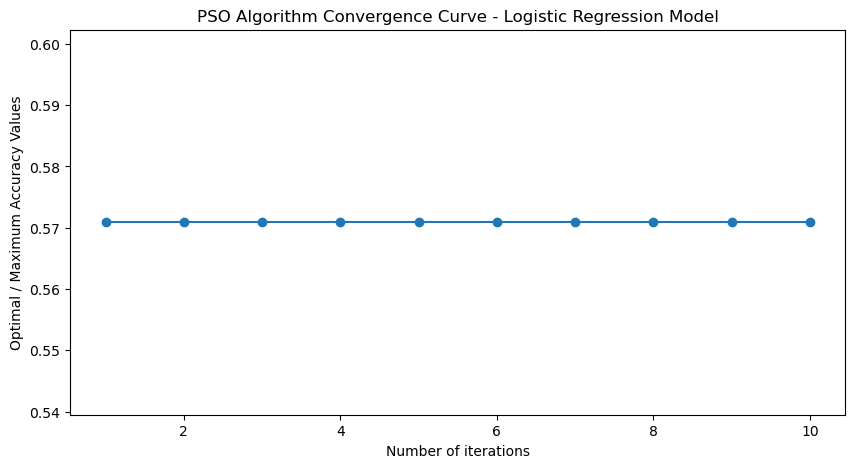

In [ ]:
Max_No_Iteration_logistic_regression = 10
Initial_iteration_logistic_regression = 1

Optimal_values_logistic_regression = []


while Initial_iteration_logistic_regression <= Max_No_Iteration_logistic_regression:
    
    

    r1_logistic_regression=[]
    r2_logistic_regression=[]
    r1_logistic_regression = random.rand(1,Attributes)
    r1_logistic_regression = r1_logistic_regression.flatten()
    r2_logistic_regression = random.rand(1,Attributes)
    r2_logistic_regression = r2_logistic_regression.flatten()

    
    Velocities_update_logistic_regression = []
    Velocities_New_logistic_regression = []
    for row in range(Particles):
        Velocities_update_logistic_regression = w * Velocities [row] + c1 * r1_logistic_regression * (P_best_logistic_regression [row] - Particle_Positons [row]) + c2 * r2_logistic_regression * (G_best_logistic_regression - Particle_Positons [row])
        Velocities_New_logistic_regression.append(Velocities_update_logistic_regression)
        
    Velocities = Velocities_New_logistic_regression
    
    Particle_Positons_update_logistic_regression = []
    Particle_Positons_New_logistic_regression = []
    for row in range((Particles)):
        Particle_Positons_update_logistic_regression = Velocities_New_logistic_regression [row] +  Particle_Positons [row]
        Particle_Positons_New_logistic_regression.append(Particle_Positons_update_logistic_regression)

    #######################################################################
    ####### Update Fitness Function with Updated Positions ##################
    ##########################################################################

    

    store_list_logistic_regression=[]
    indexing_positions_logistic_regression = []
    b_logistic_regression = []
    storing_P_logistic_regression = []
    storing_PPP_logistic_regression = []
    Index_Numbers_logistic_regression = []
    P_logistic_regression = []
    PPP_logistic_regression = []
    Particle_Positons_dataframe_New_logistic_regression = []
    Particle_Positons_New_logistic_regression = [abs(u) for u in Particle_Positons_New_logistic_regression]
    Particle_Positons_dataframe_New_logistic_regression = pd.DataFrame(Particle_Positons_New_logistic_regression) 
    #display(Particle_Positons_dataframe_New_logistic_regression)
    
    
    
    #for i in range(Particles):
    #    P_logistic_regression = x.iloc[:,Particle_Positons_New_logistic_regression[i]>=0.5].values
    #    storing_P_logistic_regression.append(P_logistic_regression)
    
    for i in range(Particles):
        # Generate a list of column indices and shuffle it
        column_indices = list(range(x.shape[1]))
        random.shuffle(column_indices)
        # Select the number of columns (at least 10)
        num_columns = random.randint(20, x.shape[1])  # Select a random integer between 10 and the total number of columns in x
        selected_indices = column_indices[:num_columns]
        # Select columns based on the random selection
        P_logistic_regression = x.iloc[:, selected_indices].values
        # Append selected columns to storing list
        storing_P_logistic_regression.append(P_logistic_regression)  



    storing_P_0_logistic_regression = storing_P_logistic_regression[0]
    x0_logistic_regression = []
    x0_logistic_regression = storing_P_0_logistic_regression
    x0_logistic_regression=pd.DataFrame(x0_logistic_regression)
    #display(x0_logistic_regression)
    
    storing_P_1_logistic_regression = storing_P_logistic_regression[1]
    x1_logistic_regression = []
    x1_logistic_regression = storing_P_1_logistic_regression
    x1_logistic_regression=pd.DataFrame(x1_logistic_regression)
    #display(x1_logistic_regression)
    
    storing_P_2_logistic_regression = storing_P_logistic_regression[2]
    x2_logistic_regression = []
    x2_logistic_regression = storing_P_2_logistic_regression
    x2_logistic_regression=pd.DataFrame(x2_logistic_regression)
    #display(x2_logistic_regression)
    
    storing_P_3_logistic_regression = storing_P_logistic_regression[3]
    x3_logistic_regression = []
    x3_logistic_regression = storing_P_0_logistic_regression
    x3_logistic_regression=pd.DataFrame(x3_logistic_regression)
    #display(x3_logistic_regression)
    
    storing_P_4_logistic_regression = storing_P_logistic_regression[4]
    x4_logistic_regression = []
    x4_logistic_regression = storing_P_4_logistic_regression
    x4_logistic_regression=pd.DataFrame(x4_logistic_regression)
    #display(x4_logistic_regression)


    
    ####################################################################################
    #####################################################################################
    ###########################################################################



####################################################################################
    #####################################################################################
    ###########################################################################

   #Splitting data into training and test sets

    x0_train_logistic_regression = []
    x1_train_logistic_regression = []
    x2_train_logistic_regression = []
    x3_train_logistic_regression = []
    x4_train_logistic_regression = []
    
    x0_test_logistic_regression = []
    x1_test_logistic_regression = []
    x2_test_logistic_regression = []
    x3_test_logistic_regression = []
    x4_test_logistic_regression = []
    
    y_train_logistic_regression = []
    y_test_logistic_regression = []

    x0_train_logistic_regression,x0_test_logistic_regression,y_train_logistic_regression,y_test_logistic_regression = train_test_split(x0_logistic_regression,y,test_size=0.2,random_state=0)


    x1_train_logistic_regression,x1_test_logistic_regression,y_train_logistic_regression,y_test_logistic_regression = train_test_split(x1_logistic_regression,y,test_size=0.2,random_state=0)


    x2_train_logistic_regression,x2_test_logistic_regression,y_train_logistic_regression,y_test_logistic_regression = train_test_split(x2_logistic_regression,y,test_size=0.2,random_state=0)


    x3_train_logistic_regression,x3_test_logistic_regression,y_train_logistic_regression,y_test_logistic_regression = train_test_split(x3_logistic_regression,y,test_size=0.2,random_state=0)


    x4_train_logistic_regression,x4_test_logistic_regression,y_train_logistic_regression,y_test_logistic_regression = train_test_split(x4_logistic_regression,y,test_size=0.2,random_state=0)
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    model_logistic_x0 = []
    model_logistic_x1 = []
    model_logistic_x2 = []
    model_logistic_x3 = []
    model_logistic_x4 = []

    model_logistic_x0 = LogisticRegression()
    model_logistic_x0.fit(x0_train_logistic_regression, y_train_logistic_regression)
    #print('Logistic Regression Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test_logistic_regression, model_logistic_x0.predict(x0_test_logistic_regression))))



    model_logistic_x1 = LogisticRegression()
    model_logistic_x1.fit(x1_train_logistic_regression, y_train_logistic_regression)
    #print('Logistic Regression Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test_logistic_regression, model_logistic_x1.predict(x1_test_logistic_regression))))



    model_logistic_x2 = LogisticRegression()
    model_logistic_x2.fit(x2_train_logistic_regression, y_train_logistic_regression)
    #print('Logistic Regression Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test_logistic_regression, model_logistic_x2.predict(x2_test_logistic_regression))))



    model_logistic_x3 = LogisticRegression()
    model_logistic_x3.fit(x3_train_logistic_regression, y_train_logistic_regression)
    #print('Logistic Regression Model Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test_logistic_regression, model_logistic_x3.predict(x3_test_logistic_regression))))



    model_logistic_x4 = LogisticRegression()
    model_logistic_x4.fit(x4_train_logistic_regression, y_train_logistic_regression)
    #print('Logistic Regression Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test_logistic_regression, model_logistic_x4.predict(x4_test_logistic_regression))))



    model_logistic_F_New = np.array([[accuracy_score(y_test_logistic_regression, model_logistic_x0.predict(x0_test_logistic_regression))],[accuracy_score(y_test_logistic_regression, model_logistic_x1.predict(x1_test_logistic_regression))],[accuracy_score(y_test_logistic_regression, model_logistic_x2.predict(x2_test_logistic_regression))],[accuracy_score(y_test_logistic_regression, model_logistic_x3.predict(x3_test_logistic_regression))],[accuracy_score(y_test_logistic_regression, model_logistic_x4.predict(x4_test_logistic_regression))]])
    #print('Fitness Function New:\n',model_logistic_F_New)
    
####################################################################################
    #####################################################################################
    ###########################################################################

    
    
    ############################################################################
    ################# Comparing Fitness Functions    ###########################
    ############################################################################
    
    for row in range(Particles):
        if  model_logistic_F_old[row] < model_logistic_F_New[row]:
            model_logistic_F_old [row] = model_logistic_F_New[row]
            Particle_Positons[row] = Particle_Positons_New_logistic_regression[row]
            P_best_logistic_regression[row] = Particle_Positons[row]

    #print('Fitness Function Old :\n',model_logistic_F_old)
    
    
    
    
     # Chooseing the particle with best fitness value as Accuracy
        
        
    Max_Value_Fitness_Function_Old_logistic_regression = []   
    indexOfMaximum_logistic_regression = []

    Max_Value_Fitness_Function_Old_logistic_regression = np.max(model_logistic_F_old)
    #print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old_logistic_regression)

    indexOfMaximum_logistic_regression = np.argmax(model_logistic_F_old)
    #print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum_logistic_regression)

    #indexOfMax_logistic_regression = model_logistic_F_old.index(Max_Value_Fitness_Function_Old_logistic_regression)
    #print('Index Of Optimal Value:\n',indexOfMax_logistic_regression)

    #P_best_logistic_regression = Particle_Positons_logistic_regression
    #print('Initial Particles Best Positions:\n',P_best_logistic_regression)

    #P_best_Transpose_logistic_regression = P_best_logistic_regression.T

    G_best_logistic_regression = P_best_logistic_regression[indexOfMaximum_logistic_regression]
   # print('Global Best Position:\n',G_best_logistic_regression)
    


    Optimal_values_logistic_regression.append(Max_Value_Fitness_Function_Old_logistic_regression )
    #print('Optimal Values:\n',Optimal_values_logistic_regression)
    
     
    
    Initial_iteration_logistic_regression +=1

    
    # 1. Prepare data 

xxx_logistic_regression = Max_No_Iteration_logistic_regression
yyy_logistic_regression = Optimal_values_logistic_regression

numbers_array = np.arange(1, xxx_logistic_regression + 1)
# 2. Setup plot

fig, ax = plt.subplots(figsize = (10, 5))

# 3. Plot Data
plt.plot(numbers_array, yyy_logistic_regression, marker='o')

# 4. Customize plot
ax.set(
title  = 'PSO Algorithm Convergence Curve - Logistic Regression Model',
xlabel = 'Number of iterations',
ylabel = 'Optimal / Maximum Accuracy Values');

**7b. PSO iterations - Decision Tree Model**

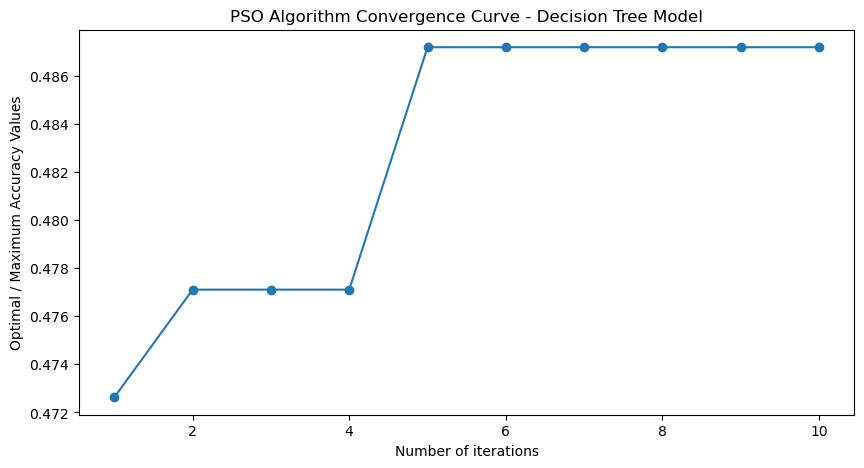

In [ ]:
Max_No_Iteration_decision_tree = 10
Initial_iteration_decision_tree = 1

Optimal_values_decision_tree = []


while Initial_iteration_decision_tree <= Max_No_Iteration_decision_tree:
    
    

    r1_decision_tree=[]
    r2_decision_tree=[]
    r1_decision_tree = random.rand(1,Attributes)
    r1_decision_tree = r1_decision_tree.flatten()
    r2_decision_tree = random.rand(1,Attributes)
    r2_decision_tree = r2_decision_tree.flatten()

    
    Velocities_update_decision_tree = []
    Velocities_New_decision_tree = []
    for row in range(Particles):
        Velocities_update_decision_tree = w * Velocities [row] + c1 * r1_decision_tree * (P_best_decision_tree [row] - Particle_Positons [row]) + c2 * r2_decision_tree * (G_best_decision_tree - Particle_Positons [row])
        Velocities_New_decision_tree.append(Velocities_update_decision_tree)
        
    Velocities = Velocities_New_decision_tree
    
    Particle_Positons_update_decision_tree = []
    Particle_Positons_New_decision_tree = []
    for row in range((Particles)):
        Particle_Positons_update_decision_tree = Velocities_New_decision_tree [row] +  Particle_Positons [row]
        Particle_Positons_New_decision_tree.append(Particle_Positons_update_decision_tree)

    #######################################################################
    ####### Update Fitness Function with Updated Positions ##################
    ##########################################################################

    

    store_list_decision_tree=[]
    indexing_positions_decision_tree = []
    b_decision_tree = []
    storing_P_decision_tree = []
    storing_PPP_decision_tree = []
    Index_Numbers_decision_tree = []
    P_decision_tree = []
    PPP_decision_tree = []
    Particle_Positons_dataframe_New_decision_tree = []
    Particle_Positons_New_decision_tree = [abs(u) for u in Particle_Positons_New_decision_tree]
    Particle_Positons_dataframe_New_decision_tree = pd.DataFrame(Particle_Positons_New_decision_tree) 
    #display(Particle_Positons_dataframe_New_decision_tree)
    
    
    
    #for i in range(Particles):
    #    P_decision_tree = x.iloc[:,Particle_Positons_New_decision_tree[i]>=0.5].values
    #    storing_P_decision_tree.append(P_decision_tree)
    
    for i in range(Particles):
        # Generate a list of column indices and shuffle it
        column_indices = list(range(x.shape[1]))
        random.shuffle(column_indices)
        # Select the number of columns (at least 10)
        num_columns = random.randint(20, x.shape[1])  # Select a random integer between 10 and the total number of columns in x
        selected_indices = column_indices[:num_columns]
        # Select columns based on the random selection
        P_decision_tree = x.iloc[:, selected_indices].values
        # Append selected columns to storing list
        storing_P_decision_tree.append(P_decision_tree)  



    storing_P_0_decision_tree = storing_P_decision_tree[0]
    x0_decision_tree = []
    x0_decision_tree = storing_P_0_decision_tree
    x0_decision_tree=pd.DataFrame(x0_decision_tree)
    #display(x0_decision_tree)
    
    storing_P_1_decision_tree = storing_P_decision_tree[1]
    x1_decision_tree = []
    x1_decision_tree = storing_P_1_decision_tree
    x1_decision_tree=pd.DataFrame(x1_decision_tree)
    #display(x1_decision_tree)
    
    storing_P_2_decision_tree = storing_P_decision_tree[2]
    x2_decision_tree = []
    x2_decision_tree = storing_P_2_decision_tree
    x2_decision_tree = pd.DataFrame(x2_decision_tree)
    #display(x2_decision_tree)
    
    storing_P_3_decision_tree = storing_P_decision_tree[3]
    x3_decision_tree = []
    x3_decision_tree = storing_P_0_decision_tree
    x3_decision_tree = pd.DataFrame(x3_decision_tree)
    #display(x3_decision_tree)
    
    storing_P_4_decision_tree = storing_P_decision_tree[4]
    x4_decision_tree = []
    x4_decision_tree = storing_P_4_decision_tree
    x4_decision_tree = pd.DataFrame(x4_decision_tree)
    #display(x4_decision_tree)


    
    ####################################################################################
    #####################################################################################
    ###########################################################################



####################################################################################
    #####################################################################################
    ###########################################################################

   #Splitting data into training and test sets

    x0_train_decision_tree = []
    x1_train_decision_tree = []
    x2_train_decision_tree = []
    x3_train_decision_tree = []
    x4_train_decision_tree = []
    
    x0_test_decision_tree = []
    x1_test_decision_tree = []
    x2_test_decision_tree = []
    x3_test_decision_tree = []
    x4_test_decision_tree = []
    
    y_train_decision_tree = []
    y_test_decision_tree = []

    x0_train_decision_tree,x0_test_decision_tree,y_train_decision_tree,y_test_decision_tree = train_test_split(x0_decision_tree,y,test_size=0.2,random_state=0)


    x1_train_decision_tree,x1_test_decision_tree,y_train_decision_tree,y_test_decision_tree = train_test_split(x1_decision_tree,y,test_size=0.2,random_state=0)


    x2_train_decision_tree,x2_test_decision_tree,y_train_decision_tree,y_test_decision_tree = train_test_split(x2_decision_tree,y,test_size=0.2,random_state=0)


    x3_train_decision_tree,x3_test_decision_tree,y_train_decision_tree,y_test_decision_tree = train_test_split(x3_decision_tree,y,test_size=0.2,random_state=0)


    x4_train_decision_tree,x4_test_decision_tree,y_train_decision_tree,y_test_decision_tree = train_test_split(x4_decision_tree,y,test_size=0.2,random_state=0)
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    model_decision_tree_x0 = []
    model_decision_tree_x1 = []
    model_decision_tree_x2 = []
    model_decision_tree_x3 = []
    model_decision_tree_x4 = []

    model_decision_tree_x0 = DecisionTreeClassifier(random_state=42)
    model_decision_tree_x0.fit(x0_train_decision_tree, y_train_decision_tree)
    #print('decision_tree Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test_decision_tree, model_decision_tree_x0.predict(x0_test_decision_tree))))



    model_decision_tree_x1 = DecisionTreeClassifier(random_state=42)
    model_decision_tree_x1.fit(x1_train_decision_tree, y_train_decision_tree)
    #print('decision_tree Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test_decision_tree, model_decision_tree_x1.predict(x1_test_decision_tree))))



    model_decision_tree_x2 = DecisionTreeClassifier(random_state=42)
    model_decision_tree_x2.fit(x2_train_decision_tree, y_train_decision_tree)
    #print('decision_tree Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test_decision_tree, model_decision_tree_x2.predict(x2_test_decision_tree))))



    model_decision_tree_x3 = DecisionTreeClassifier(random_state=42)
    model_decision_tree_x3.fit(x3_train_decision_tree, y_train_decision_tree)
    #print('decision_tree Model Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test_decision_tree, model_decision_tree_x3.predict(x3_test_decision_tree))))



    model_decision_tree_x4 = DecisionTreeClassifier(random_state=42)
    model_decision_tree_x4.fit(x4_train_decision_tree, y_train_decision_tree)
    #print('decision_tree Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test_decision_tree, model_decision_tree_x4.predict(x4_test_decision_tree))))



    model_decision_tree_F_New = np.array([[accuracy_score(y_test_decision_tree, model_decision_tree_x0.predict(x0_test_decision_tree))],[accuracy_score(y_test_decision_tree, model_decision_tree_x1.predict(x1_test_decision_tree))],[accuracy_score(y_test_decision_tree, model_decision_tree_x2.predict(x2_test_decision_tree))],[accuracy_score(y_test_decision_tree, model_decision_tree_x3.predict(x3_test_decision_tree))],[accuracy_score(y_test_decision_tree, model_decision_tree_x4.predict(x4_test_decision_tree))]])
    #print('Fitness Function New:\n',model_decision_tree_F_New)
    
####################################################################################
    #####################################################################################
    ###########################################################################

    
    
    ############################################################################
    ################# Comparing Fitness Functions    ###########################
    ############################################################################
    
    for row in range(Particles):
        if  model_decision_tree_F_old[row] < model_decision_tree_F_New[row]:
            model_decision_tree_F_old [row] = model_decision_tree_F_New[row]
            Particle_Positons[row] = Particle_Positons_New_decision_tree[row]
            P_best_decision_tree[row] = Particle_Positons[row]

    #print('Fitness Function Old :\n',model_decision_tree_F_old)
    
    
    
    
     # Chooseing the particle with best fitness value as Accuracy
        
        
    Max_Value_Fitness_Function_Old_decision_tree = []   
    indexOfMaximum_decision_tree = []

    Max_Value_Fitness_Function_Old_decision_tree = np.max(model_decision_tree_F_old)
    #print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old_decision_tree)

    indexOfMaximum_decision_tree = np.argmax(model_decision_tree_F_old)
    #print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum_decision_tree)

    #indexOfMax_decision_tree = model_decision_tree_F_old.index(Max_Value_Fitness_Function_Old_decision_tree)
    #print('Index Of Optimal Value:\n',indexOfMax_decision_tree)

    #P_best_decision_tree = Particle_Positons_decision_tree
    #print('Initial Particles Best Positions:\n',P_best_decision_tree)

    #P_best_Transpose_decision_tree = P_best_decision_tree.T

    G_best_decision_tree = P_best_decision_tree[indexOfMaximum_decision_tree]
   # print('Global Best Position:\n',G_best_decision_tree)
    


    Optimal_values_decision_tree.append(Max_Value_Fitness_Function_Old_decision_tree)
    #print('Optimal Values:\n',Optimal_values_decision_tree)
    
     
    
    Initial_iteration_decision_tree +=1

    
    # 1. Prepare data 

xxx_decision_tree = Max_No_Iteration_decision_tree
yyy_decision_tree = Optimal_values_decision_tree

numbers_array = np.arange(1, xxx_decision_tree + 1)
# 2. Setup plot

fig, ax = plt.subplots(figsize = (10, 5))

# 3. Plot Data
plt.plot(numbers_array, yyy_decision_tree, marker='o')

# 4. Customize plot
ax.set(
title  = 'PSO Algorithm Convergence Curve - Decision Tree Model',
xlabel = 'Number of iterations',
ylabel = 'Optimal / Maximum Accuracy Values');

**7c. PSO iterations - Random Forest Model**

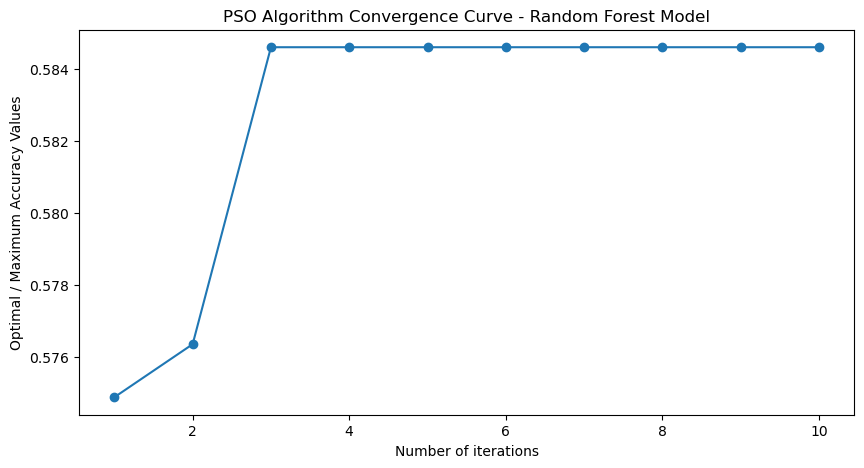

In [ ]:
Max_No_Iteration_random_forest = 10
Initial_iteration_random_forest = 1

Optimal_values_random_forest = []


while Initial_iteration_random_forest <= Max_No_Iteration_random_forest:
    
    

    r1_random_forest = []
    r2_random_forest = []
    r1_random_forest = random.rand(1,Attributes)
    r1_random_forest = r1_random_forest.flatten()
    r2_random_forest = random.rand(1,Attributes)
    r2_random_forest = r2_random_forest.flatten()

    
    Velocities_update_random_forest = []
    Velocities_New_random_forest = []
    for row in range(Particles):
        Velocities_update_random_forest = w * Velocities [row] + c1 * r1_random_forest * (P_best_random_forest [row] - Particle_Positons [row]) + c2 * r2_random_forest * (G_best_random_forest - Particle_Positons [row])
        Velocities_New_random_forest.append(Velocities_update_random_forest)
        
    Velocities = Velocities_New_random_forest
    
    Particle_Positons_update_random_forest = []
    Particle_Positons_New_random_forest = []
    for row in range((Particles)):
        Particle_Positons_update_random_forest = Velocities_New_random_forest [row] +  Particle_Positons [row]
        Particle_Positons_New_random_forest.append(Particle_Positons_update_random_forest)

    #######################################################################
    ####### Update Fitness Function with Updated Positions ##################
    ##########################################################################

    

    store_list_random_forest = []
    indexing_positions_random_forest = []
    b_random_forest = []
    storing_P_random_forest = []
    storing_PPP_random_forest = []
    Index_Numbers_random_forest = []
    P_random_forest = []
    PPP_random_forest = []
    Particle_Positons_dataframe_New_random_forest = []
    Particle_Positons_New_random_forest = [abs(u) for u in Particle_Positons_New_random_forest]
    Particle_Positons_dataframe_New_random_forest = pd.DataFrame(Particle_Positons_New_random_forest) 
    #display(Particle_Positons_dataframe_New_random_forest)
    
    
    
    #for i in range(Particles):
    #    P_random_forest = x.iloc[:,Particle_Positons_New_random_forest[i]>=0.5].values
    #    storing_P_random_forest.append(P_random_forest)
    
    for i in range(Particles):
        # Generate a list of column indices and shuffle it
        column_indices = list(range(x.shape[1]))
        random.shuffle(column_indices)
        # Select the number of columns (at least 10)
        num_columns = random.randint(20, x.shape[1])  # Select a random integer between 10 and the total number of columns in x
        selected_indices = column_indices[:num_columns]
        # Select columns based on the random selection
        P_random_forest = x.iloc[:, selected_indices].values
        # Append selected columns to storing list
        storing_P_random_forest.append(P_random_forest)  



    storing_P_0_random_forest = storing_P_random_forest[0]
    x0_random_forest = []
    x0_random_forest = storing_P_0_random_forest
    x0_random_forest = pd.DataFrame(x0_random_forest)
    #display(x0_random_forest)
    
    storing_P_1_random_forest = storing_P_random_forest[1]
    x1_random_forest = []
    x1_random_forest = storing_P_1_random_forest
    x1_random_forest = pd.DataFrame(x1_random_forest)
    #display(x1_random_forest)
    
    storing_P_2_random_forest = storing_P_random_forest[2]
    x2_random_forest = []
    x2_random_forest = storing_P_2_random_forest
    x2_random_forest = pd.DataFrame(x2_random_forest)
    #display(x2_random_forest)
    
    storing_P_3_random_forest = storing_P_random_forest[3]
    x3_random_forest = []
    x3_random_forest = storing_P_0_random_forest
    x3_random_forest = pd.DataFrame(x3_random_forest)
    #display(x3_random_forest)
    
    storing_P_4_random_forest = storing_P_random_forest[4]
    x4_random_forest = []
    x4_random_forest = storing_P_4_random_forest
    x4_random_forest = pd.DataFrame(x4_random_forest)
    #display(x4_random_forest)


    
    ####################################################################################
    #####################################################################################
    ###########################################################################



####################################################################################
    #####################################################################################
    ###########################################################################

   #Splitting data into training and test sets

    x0_train_random_forest = []
    x1_train_random_forest = []
    x2_train_random_forest = []
    x3_train_random_forest = []
    x4_train_random_forest = []
    
    x0_test_random_forest = []
    x1_test_random_forest = []
    x2_test_random_forest = []
    x3_test_random_forest = []
    x4_test_random_forest = []
    
    y_train_random_forest = []
    y_test_random_forest = []

    x0_train_random_forest,x0_test_random_forest,y_train_random_forest,y_test_random_forest = train_test_split(x0_random_forest,y,test_size=0.2,random_state=0)


    x1_train_random_forest,x1_test_random_forest,y_train_random_forest,y_test_random_forest = train_test_split(x1_random_forest,y,test_size=0.2,random_state=0)


    x2_train_random_forest,x2_test_random_forest,y_train_random_forest,y_test_random_forest = train_test_split(x2_random_forest,y,test_size=0.2,random_state=0)


    x3_train_random_forest,x3_test_random_forest,y_train_random_forest,y_test_random_forest = train_test_split(x3_random_forest,y,test_size=0.2,random_state=0)


    x4_train_random_forest,x4_test_random_forest,y_train_random_forest,y_test_random_forest = train_test_split(x4_random_forest,y,test_size=0.2,random_state=0)
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    model_random_forest_x0 = []
    model_random_forest_x1 = []
    model_random_forest_x2 = []
    model_random_forest_x3 = []
    model_random_forest_x4 = []

    model_random_forest_x0 = RandomForestClassifier(n_estimators=100, random_state=42)
    model_random_forest_x0.fit(x0_train_random_forest, y_train_random_forest)
    #print('random_forest Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test_random_forest, model_random_forest_x0.predict(x0_test_random_forest))))



    model_random_forest_x1 = RandomForestClassifier(n_estimators=100, random_state=42)
    model_random_forest_x1.fit(x1_train_random_forest, y_train_random_forest)
    #print('random_forest Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test_random_forest, model_random_forest_x1.predict(x1_test_random_forest))))



    model_random_forest_x2 = RandomForestClassifier(n_estimators=100, random_state=42)
    model_random_forest_x2.fit(x2_train_random_forest, y_train_random_forest)
    #print('random_forest Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test_random_forest, model_random_forest_x2.predict(x2_test_random_forest))))



    model_random_forest_x3 = RandomForestClassifier(n_estimators=100, random_state=42)
    model_random_forest_x3.fit(x3_train_random_forest, y_train_random_forest)
    #print('random_forest Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test_random_forest, model_random_forest_x3.predict(x3_test_random_forest))))



    model_random_forest_x4 = RandomForestClassifier(n_estimators=100, random_state=42)
    model_random_forest_x4.fit(x4_train_random_forest, y_train_random_forest)
    #print('random_forest Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test_random_forest, model_random_forest_x4.predict(x4_test_random_forest))))



    model_random_forest_F_New = np.array([[accuracy_score(y_test_random_forest, model_random_forest_x0.predict(x0_test_random_forest))],[accuracy_score(y_test_random_forest, model_random_forest_x1.predict(x1_test_random_forest))],[accuracy_score(y_test_random_forest, model_random_forest_x2.predict(x2_test_random_forest))],[accuracy_score(y_test_random_forest, model_random_forest_x3.predict(x3_test_random_forest))],[accuracy_score(y_test_random_forest, model_random_forest_x4.predict(x4_test_random_forest))]])
    #print('Fitness Function New:\n',model_random_forest_F_New)
    
####################################################################################
    #####################################################################################
    ###########################################################################

    
    
    ############################################################################
    ################# Comparing Fitness Functions    ###########################
    ############################################################################
    
    for row in range(Particles):
        if  model_random_forest_F_old[row] < model_random_forest_F_New[row]:
            model_random_forest_F_old [row] = model_random_forest_F_New[row]
            Particle_Positons[row] = Particle_Positons_New_random_forest[row]
            P_best_random_forest[row] = Particle_Positons[row]

    #print('Fitness Function Old :\n',model_random_forest_F_old)
    
    
    
    
     # Chooseing the particle with best fitness value as Accuracy
        
        
    Max_Value_Fitness_Function_Old_random_forest = []   
    indexOfMaximum_random_forest = []

    Max_Value_Fitness_Function_Old_random_forest = np.max(model_random_forest_F_old)
    #print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old_random_forest)

    indexOfMaximum_random_forest = np.argmax(model_random_forest_F_old)
    #print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum_random_forest)

    #indexOfMax_random_forest = model_random_forest_F_old.index(Max_Value_Fitness_Function_Old_random_forest)
    #print('Index Of Optimal Value:\n',indexOfMax_random_forest)

    #P_best_random_forest = Particle_Positons_random_forest
    #print('Initial Particles Best Positions:\n',P_best_random_forest)

    #P_best_Transpose_random_forest = P_best_random_forest.T

    G_best_random_forest = P_best_random_forest[indexOfMaximum_random_forest]
   # print('Global Best Position:\n',G_best_random_forest)
    


    Optimal_values_random_forest.append(Max_Value_Fitness_Function_Old_random_forest)
    #print('Optimal Values:\n',Optimal_values_random_forest)
    
     
    
    Initial_iteration_random_forest +=1

    
    # 1. Prepare data 

xxx_random_forest = Max_No_Iteration_random_forest
yyy_random_forest = Optimal_values_random_forest

numbers_array = np.arange(1, xxx_random_forest + 1)
# 2. Setup plot

fig, ax = plt.subplots(figsize = (10, 5))

# 3. Plot Data
plt.plot(numbers_array, yyy_random_forest, marker='o')

# 4. Customize plot
ax.set(
title  = 'PSO Algorithm Convergence Curve - Random Forest Model',
xlabel = 'Number of iterations',
ylabel = 'Optimal / Maximum Accuracy Values');

**7d. PSO iterations - Naive Bayes Model**

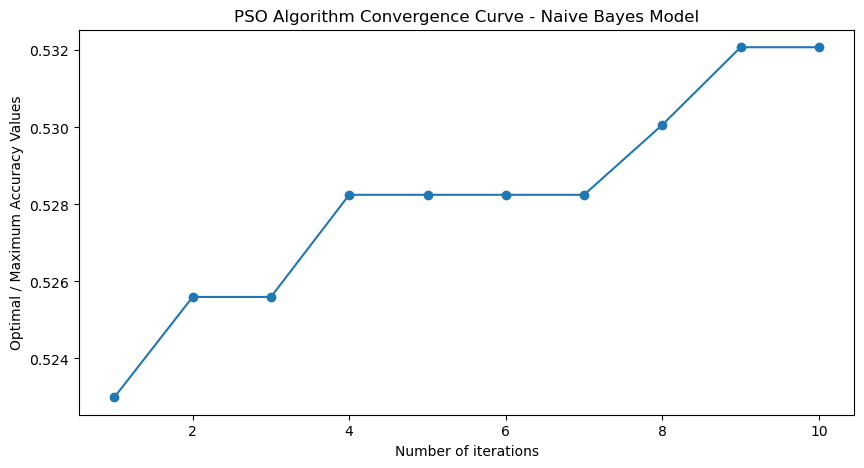

In [ ]:
Max_No_Iteration_naive_bayes = 10
Initial_iteration_naive_bayes = 1

Optimal_values_naive_bayes = []


while Initial_iteration_naive_bayes <= Max_No_Iteration_naive_bayes:
    
    

    r1_naive_bayes = []
    r2_naive_bayes = []
    r1_naive_bayes = random.rand(1,Attributes)
    r1_naive_bayes = r1_naive_bayes.flatten()
    r2_naive_bayes = random.rand(1,Attributes)
    r2_naive_bayes = r2_naive_bayes.flatten()

    
    Velocities_update_naive_bayes = []
    Velocities_New_naive_bayes = []
    for row in range(Particles):
        Velocities_update_naive_bayes = w * Velocities [row] + c1 * r1_naive_bayes * (P_best_naive_bayes [row] - Particle_Positons [row]) + c2 * r2_naive_bayes * (G_best_naive_bayes - Particle_Positons [row])
        Velocities_New_naive_bayes.append(Velocities_update_naive_bayes)
        
    Velocities = Velocities_New_naive_bayes
    
    Particle_Positons_update_naive_bayes = []
    Particle_Positons_New_naive_bayes = []
    for row in range((Particles)):
        Particle_Positons_update_naive_bayes = Velocities_New_naive_bayes [row] +  Particle_Positons [row]
        Particle_Positons_New_naive_bayes.append(Particle_Positons_update_naive_bayes)

    #######################################################################
    ####### Update Fitness Function with Updated Positions ##################
    ##########################################################################

    

    store_list_naive_bayes = []
    indexing_positions_naive_bayes = []
    b_naive_bayes = []
    storing_P_naive_bayes = []
    storing_PPP_naive_bayes = []
    Index_Numbers_naive_bayes = []
    P_naive_bayes = []
    PPP_naive_bayes = []
    Particle_Positons_dataframe_New_naive_bayes = []
    Particle_Positons_New_naive_bayes = [abs(u) for u in Particle_Positons_New_naive_bayes]
    Particle_Positons_dataframe_New_naive_bayes = pd.DataFrame(Particle_Positons_New_naive_bayes) 
    #display(Particle_Positons_dataframe_New_naive_bayes)
    
    
    
    #for i in range(Particles):
    #    P_naive_bayes = x.iloc[:,Particle_Positons_New_naive_bayes[i]>=0.5].values
    #    storing_P_naive_bayes.append(P_naive_bayes)
    
    for i in range(Particles):
        # Generate a list of column indices and shuffle it
        column_indices = list(range(x.shape[1]))
        random.shuffle(column_indices)
        # Select the number of columns (at least 10)
        num_columns = random.randint(20, x.shape[1])  # Select a random integer between 10 and the total number of columns in x
        selected_indices = column_indices[:num_columns]
        # Select columns based on the random selection
        P_naive_bayes = x.iloc[:, selected_indices].values
        # Append selected columns to storing list
        storing_P_naive_bayes.append(P_naive_bayes)  



    storing_P_0_naive_bayes = storing_P_naive_bayes[0]
    x0_naive_bayes = []
    x0_naive_bayes = storing_P_0_naive_bayes
    x0_naive_bayes = pd.DataFrame(x0_naive_bayes)
    #display(x0_naive_bayes)
    
    storing_P_1_naive_bayes = storing_P_naive_bayes[1]
    x1_naive_bayes = []
    x1_naive_bayes = storing_P_1_naive_bayes
    x1_naive_bayes = pd.DataFrame(x1_naive_bayes)
    #display(x1_naive_bayes)
    
    storing_P_2_naive_bayes = storing_P_naive_bayes[2]
    x2_naive_bayes = []
    x2_naive_bayes = storing_P_2_naive_bayes
    x2_naive_bayes = pd.DataFrame(x2_naive_bayes)
    #display(x2_naive_bayes)
    
    storing_P_3_naive_bayes = storing_P_naive_bayes[3]
    x3_naive_bayes = []
    x3_naive_bayes = storing_P_0_naive_bayes
    x3_naive_bayes = pd.DataFrame(x3_naive_bayes)
    #display(x3_naive_bayes)
    
    storing_P_4_naive_bayes = storing_P_naive_bayes[4]
    x4_naive_bayes = []
    x4_naive_bayes = storing_P_4_naive_bayes
    x4_naive_bayes = pd.DataFrame(x4_naive_bayes)
    #display(x4_naive_bayes)


    
    ####################################################################################
    #####################################################################################
    ###########################################################################



####################################################################################
    #####################################################################################
    ###########################################################################

   #Splitting data into training and test sets

    x0_train_naive_bayes = []
    x1_train_naive_bayes = []
    x2_train_naive_bayes = []
    x3_train_naive_bayes = []
    x4_train_naive_bayes = []
    
    x0_test_naive_bayes = []
    x1_test_naive_bayes = []
    x2_test_naive_bayes = []
    x3_test_naive_bayes = []
    x4_test_naive_bayes = []
    
    y_train_naive_bayes = []
    y_test_naive_bayes = []

    x0_train_naive_bayes,x0_test_naive_bayes,y_train_naive_bayes,y_test_naive_bayes = train_test_split(x0_naive_bayes,y,test_size=0.2,random_state=0)


    x1_train_naive_bayes,x1_test_naive_bayes,y_train_naive_bayes,y_test_naive_bayes = train_test_split(x1_naive_bayes,y,test_size=0.2,random_state=0)


    x2_train_naive_bayes,x2_test_naive_bayes,y_train_naive_bayes,y_test_naive_bayes = train_test_split(x2_naive_bayes,y,test_size=0.2,random_state=0)


    x3_train_naive_bayes,x3_test_naive_bayes,y_train_naive_bayes,y_test_naive_bayes = train_test_split(x3_naive_bayes,y,test_size=0.2,random_state=0)


    x4_train_naive_bayes,x4_test_naive_bayes,y_train_naive_bayes,y_test_naive_bayes = train_test_split(x4_naive_bayes,y,test_size=0.2,random_state=0)
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    model_naive_bayes_x0 = []
    model_naive_bayes_x1 = []
    model_naive_bayes_x2 = []
    model_naive_bayes_x3 = []
    model_naive_bayes_x4 = []

    model_naive_bayes_x0 = GaussianNB()
    model_naive_bayes_x0.fit(x0_train_naive_bayes, y_train_naive_bayes)
    #print('naive_bayes Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test_naive_bayes, model_naive_bayes_x0.predict(x0_test_naive_bayes))))



    model_naive_bayes_x1 = GaussianNB()
    model_naive_bayes_x1.fit(x1_train_naive_bayes, y_train_naive_bayes)
    #print('naive_bayes Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test_naive_bayes, model_naive_bayes_x1.predict(x1_test_naive_bayes))))



    model_naive_bayes_x2 = GaussianNB()
    model_naive_bayes_x2.fit(x2_train_naive_bayes, y_train_naive_bayes)
    #print('naive_bayes Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test_naive_bayes, model_naive_bayes_x2.predict(x2_test_naive_bayes))))



    model_naive_bayes_x3 = GaussianNB()
    model_naive_bayes_x3.fit(x3_train_naive_bayes, y_train_naive_bayes)
    #print('naive_bayes Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test_naive_bayes, model_naive_bayes_x3.predict(x3_test_naive_bayes))))



    model_naive_bayes_x4 = GaussianNB()
    model_naive_bayes_x4.fit(x4_train_naive_bayes, y_train_naive_bayes)
    #print('naive_bayes Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test_naive_bayes, model_naive_bayes_x4.predict(x4_test_naive_bayes))))



    model_naive_bayes_F_New = np.array([[accuracy_score(y_test_naive_bayes, model_naive_bayes_x0.predict(x0_test_naive_bayes))],[accuracy_score(y_test_naive_bayes, model_naive_bayes_x1.predict(x1_test_naive_bayes))],[accuracy_score(y_test_naive_bayes, model_naive_bayes_x2.predict(x2_test_naive_bayes))],[accuracy_score(y_test_naive_bayes, model_naive_bayes_x3.predict(x3_test_naive_bayes))],[accuracy_score(y_test_naive_bayes, model_naive_bayes_x4.predict(x4_test_naive_bayes))]])
    #print('Fitness Function New:\n',model_naive_bayes_F_New)
    
####################################################################################
    #####################################################################################
    ###########################################################################

    
    
    ############################################################################
    ################# Comparing Fitness Functions    ###########################
    ############################################################################
    
    for row in range(Particles):
        if  model_naive_bayes_F_old[row] < model_naive_bayes_F_New[row]:
            model_naive_bayes_F_old [row] = model_naive_bayes_F_New[row]
            Particle_Positons[row] = Particle_Positons_New_naive_bayes[row]
            P_best_naive_bayes[row] = Particle_Positons[row]

    #print('Fitness Function Old :\n',model_naive_bayes_F_old)
    
    
    
    
     # Chooseing the particle with best fitness value as Accuracy
        
        
    Max_Value_Fitness_Function_Old_naive_bayes = []   
    indexOfMaximum_naive_bayes = []

    Max_Value_Fitness_Function_Old_naive_bayes = np.max(model_naive_bayes_F_old)
    #print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old_naive_bayes)

    indexOfMaximum_naive_bayes = np.argmax(model_naive_bayes_F_old)
    #print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum_naive_bayes)

    #indexOfMax_naive_bayes = model_naive_bayes_F_old.index(Max_Value_Fitness_Function_Old_naive_bayes)
    #print('Index Of Optimal Value:\n',indexOfMax_naive_bayes)

    #P_best_naive_bayes = Particle_Positons_naive_bayes
    #print('Initial Particles Best Positions:\n',P_best_naive_bayes)

    #P_best_Transpose_naive_bayes = P_best_naive_bayes.T

    G_best_naive_bayes = P_best_naive_bayes[indexOfMaximum_naive_bayes]
   # print('Global Best Position:\n',G_best_naive_bayes)
    


    Optimal_values_naive_bayes.append(Max_Value_Fitness_Function_Old_naive_bayes)
    #print('Optimal Values:\n',Optimal_values_naive_bayes)
    
     
    
    Initial_iteration_naive_bayes +=1

    
    # 1. Prepare data 

xxx_naive_bayes = Max_No_Iteration_naive_bayes
yyy_naive_bayes = Optimal_values_naive_bayes

numbers_array = np.arange(1, xxx_naive_bayes + 1)
# 2. Setup plot

fig, ax = plt.subplots(figsize = (10, 5))

# 3. Plot Data
plt.plot(numbers_array, yyy_naive_bayes, marker='o')

# 4. Customize plot
ax.set(
title  = 'PSO Algorithm Convergence Curve - Naive Bayes Model',
xlabel = 'Number of iterations',
ylabel = 'Optimal / Maximum Accuracy Values');

**7e. PSO iterations - Gradient Boosting Classifier Model**

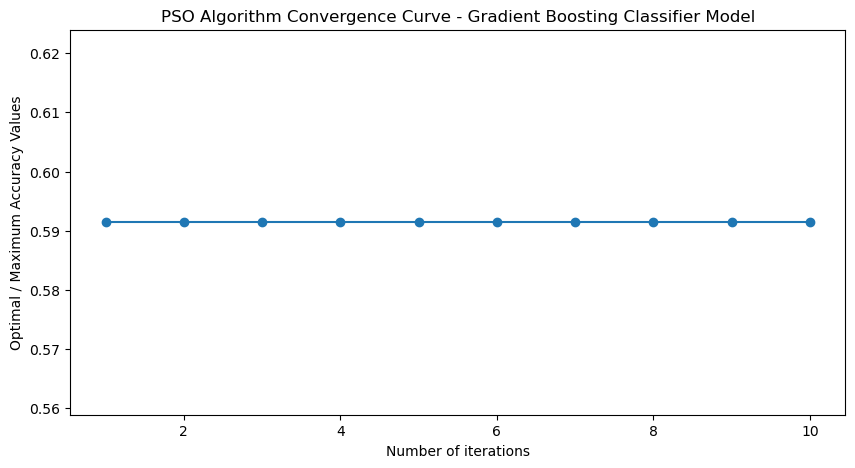

In [ ]:
Max_No_Iteration_GradientBoostingClassifier = 10
Initial_iteration_GradientBoostingClassifier = 1

Optimal_values_GradientBoostingClassifier = []


while Initial_iteration_GradientBoostingClassifier <= Max_No_Iteration_GradientBoostingClassifier:
    
    

    r1_GradientBoostingClassifier = []
    r2_GradientBoostingClassifier = []
    r1_GradientBoostingClassifier = random.rand(1,Attributes)
    r1_GradientBoostingClassifier = r1_GradientBoostingClassifier.flatten()
    r2_GradientBoostingClassifier = random.rand(1,Attributes)
    r2_GradientBoostingClassifier = r2_GradientBoostingClassifier.flatten()

    
    Velocities_update_GradientBoostingClassifier = []
    Velocities_New_GradientBoostingClassifier = []
    for row in range(Particles):
        Velocities_update_GradientBoostingClassifier = w * Velocities [row] + c1 * r1_GradientBoostingClassifier * (P_best_GradientBoostingClassifier [row] - Particle_Positons [row]) + c2 * r2_GradientBoostingClassifier * (G_best_GradientBoostingClassifier - Particle_Positons [row])
        Velocities_New_GradientBoostingClassifier.append(Velocities_update_GradientBoostingClassifier)
        
    Velocities = Velocities_New_GradientBoostingClassifier
    
    Particle_Positons_update_GradientBoostingClassifier = []
    Particle_Positons_New_GradientBoostingClassifier = []
    for row in range((Particles)):
        Particle_Positons_update_GradientBoostingClassifier = Velocities_New_GradientBoostingClassifier [row] +  Particle_Positons [row]
        Particle_Positons_New_GradientBoostingClassifier.append(Particle_Positons_update_GradientBoostingClassifier)

    #######################################################################
    ####### Update Fitness Function with Updated Positions ##################
    ##########################################################################

    

    store_list_GradientBoostingClassifier = []
    indexing_positions_GradientBoostingClassifier = []
    b_GradientBoostingClassifier = []
    storing_P_GradientBoostingClassifier = []
    storing_PPP_GradientBoostingClassifier = []
    Index_Numbers_GradientBoostingClassifier = []
    P_GradientBoostingClassifier = []
    PPP_GradientBoostingClassifier = []
    Particle_Positons_dataframe_New_GradientBoostingClassifier = []
    Particle_Positons_New_GradientBoostingClassifier = [abs(u) for u in Particle_Positons_New_GradientBoostingClassifier]
    Particle_Positons_dataframe_New_GradientBoostingClassifier = pd.DataFrame(Particle_Positons_New_GradientBoostingClassifier) 
    #display(Particle_Positons_dataframe_New_GradientBoostingClassifier)
    
    
    
    #for i in range(Particles):
    #    P_naive_bayes = x.iloc[:,Particle_Positons_New_GradientBoostingClassifier[i]>=0.5].values
    #    storing_P_GradientBoostingClassifier.append(P_GradientBoostingClassifier)
    
    for i in range(Particles):
        # Generate a list of column indices and shuffle it
        column_indices = list(range(x.shape[1]))
        random.shuffle(column_indices)
        # Select the number of columns (at least 10)
        num_columns = random.randint(20, x.shape[1])  # Select a random integer between 10 and the total number of columns in x
        selected_indices = column_indices[:num_columns]
        # Select columns based on the random selection
        P_GradientBoostingClassifier = x.iloc[:, selected_indices].values
        # Append selected columns to storing list
        storing_P_GradientBoostingClassifier.append(P_GradientBoostingClassifier)  



    storing_P_0_GradientBoostingClassifier = storing_P_GradientBoostingClassifier[0]
    x0_GradientBoostingClassifier = []
    x0_GradientBoostingClassifier = storing_P_0_GradientBoostingClassifier
    x0_GradientBoostingClassifier = pd.DataFrame(x0_GradientBoostingClassifier)
    #display(x0_GradientBoostingClassifier)
    
    storing_P_1_GradientBoostingClassifier = storing_P_GradientBoostingClassifier[1]
    x1_GradientBoostingClassifier = []
    x1_GradientBoostingClassifier = storing_P_1_GradientBoostingClassifier
    x1_GradientBoostingClassifier = pd.DataFrame(x1_GradientBoostingClassifier)
    #display(x1_GradientBoostingClassifier)
    
    storing_P_2_GradientBoostingClassifier = storing_P_GradientBoostingClassifier[2]
    x2_GradientBoostingClassifier = []
    x2_GradientBoostingClassifier = storing_P_2_GradientBoostingClassifier
    x2_GradientBoostingClassifier = pd.DataFrame(x2_GradientBoostingClassifier)
    #display(x2_GradientBoostingClassifier)
    
    storing_P_3_GradientBoostingClassifier = storing_P_GradientBoostingClassifier[3]
    x3_GradientBoostingClassifier = []
    x3_GradientBoostingClassifier = storing_P_0_GradientBoostingClassifier
    x3_GradientBoostingClassifier = pd.DataFrame(x3_GradientBoostingClassifier)
    #display(x3_GradientBoostingClassifier)
    
    storing_P_4_GradientBoostingClassifier = storing_P_GradientBoostingClassifier[4]
    x4_GradientBoostingClassifier = []
    x4_GradientBoostingClassifier = storing_P_4_GradientBoostingClassifier
    x4_GradientBoostingClassifier = pd.DataFrame(x4_GradientBoostingClassifier)
    #display(x4_GradientBoostingClassifier)


    
    ####################################################################################
    #####################################################################################
    ###########################################################################



####################################################################################
    #####################################################################################
    ###########################################################################

   #Splitting data into training and test sets

    x0_train_GradientBoostingClassifier = []
    x1_train_GradientBoostingClassifier = []
    x2_train_GradientBoostingClassifier = []
    x3_train_GradientBoostingClassifier = []
    x4_train_GradientBoostingClassifier = []
    
    x0_test_GradientBoostingClassifier = []
    x1_test_GradientBoostingClassifier = []
    x2_test_GradientBoostingClassifier = []
    x3_test_GradientBoostingClassifier = []
    x4_test_GradientBoostingClassifier = []
    
    y_train_GradientBoostingClassifier = []
    y_test_GradientBoostingClassifier = []

    x0_train_GradientBoostingClassifier,x0_test_GradientBoostingClassifier,y_train_GradientBoostingClassifier,y_test_GradientBoostingClassifier = train_test_split(x0_GradientBoostingClassifier,y,test_size=0.2,random_state=0)


    x1_train_GradientBoostingClassifier,x1_test_GradientBoostingClassifier,y_train_GradientBoostingClassifier,y_test_GradientBoostingClassifier = train_test_split(x1_GradientBoostingClassifier,y,test_size=0.2,random_state=0)


    x2_train_GradientBoostingClassifier,x2_test_GradientBoostingClassifier,y_train_GradientBoostingClassifier,y_test_GradientBoostingClassifier = train_test_split(x2_GradientBoostingClassifier,y,test_size=0.2,random_state=0)


    x3_train_GradientBoostingClassifier,x3_test_GradientBoostingClassifier,y_train_GradientBoostingClassifier,y_test_GradientBoostingClassifier = train_test_split(x3_GradientBoostingClassifier,y,test_size=0.2,random_state=0)


    x4_train_GradientBoostingClassifier,x4_test_GradientBoostingClassifier,y_train_GradientBoostingClassifier,y_test_GradientBoostingClassifier = train_test_split(x4_GradientBoostingClassifier,y,test_size=0.2,random_state=0)
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    
    
    
    ####################################################################################
    #####################################################################################
    ###########################################################################
    model_GradientBoostingClassifier_x0 = []
    model_GradientBoostingClassifier_x1 = []
    model_GradientBoostingClassifier_x2 = []
    model_GradientBoostingClassifier_x3 = []
    model_GradientBoostingClassifier_x4 = []

    model_GradientBoostingClassifier_x0 = GradientBoostingClassifier(n_estimators=100, random_state=42)
    model_GradientBoostingClassifier_x0.fit(x0_train_GradientBoostingClassifier, y_train_GradientBoostingClassifier)
    #print('GradientBoostingClassifier Model Particle_0 Accuracy: {:.4f}'.format(accuracy_score(y_test_GradientBoostingClassifier, model_GradientBoostingClassifier_x0.predict(x0_test_GradientBoostingClassifier))))



    model_GradientBoostingClassifier_x1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
    model_GradientBoostingClassifier_x1.fit(x1_train_GradientBoostingClassifier, y_train_GradientBoostingClassifier)
    #print('GradientBoostingClassifier Model Particle_1 Accuracy: {:.4f}'.format(accuracy_score(y_test_GradientBoostingClassifier, model_GradientBoostingClassifier_x1.predict(x1_test_GradientBoostingClassifier))))



    model_GradientBoostingClassifier_x2 = GradientBoostingClassifier(n_estimators=100, random_state=42)
    model_GradientBoostingClassifier_x2.fit(x2_train_GradientBoostingClassifier, y_train_GradientBoostingClassifier)
    #print('GradientBoostingClassifier Model Particle_2 Accuracy: {:.4f}'.format(accuracy_score(y_test_GradientBoostingClassifier, model_GradientBoostingClassifier_x2.predict(x2_test_GradientBoostingClassifier))))



    model_GradientBoostingClassifier_x3 = GradientBoostingClassifier(n_estimators=100, random_state=42)
    model_GradientBoostingClassifier_x3.fit(x3_train_GradientBoostingClassifier, y_train_GradientBoostingClassifier)
    #print('GradientBoostingClassifier Particle_3 Accuracy: {:.4f}'.format(accuracy_score(y_test_GradientBoostingClassifier, model_GradientBoostingClassifier_x3.predict(x3_test_GradientBoostingClassifier))))



    model_GradientBoostingClassifier_x4 = GradientBoostingClassifier(n_estimators=100, random_state=42)
    model_GradientBoostingClassifier_x4.fit(x4_train_GradientBoostingClassifier, y_train_GradientBoostingClassifier)
    #print('GradientBoostingClassifier Model Particle_4 Accuracy: {:.4f}'.format(accuracy_score(y_test_GradientBoostingClassifier, model_GradientBoostingClassifier_x4.predict(x4_test_GradientBoostingClassifier))))



    model_GradientBoostingClassifier_F_New = np.array([[accuracy_score(y_test_GradientBoostingClassifier, model_GradientBoostingClassifier_x0.predict(x0_test_GradientBoostingClassifier))],[accuracy_score(y_test_GradientBoostingClassifier, model_GradientBoostingClassifier_x1.predict(x1_test_GradientBoostingClassifier))],[accuracy_score(y_test_GradientBoostingClassifier, model_GradientBoostingClassifier_x2.predict(x2_test_GradientBoostingClassifier))],[accuracy_score(y_test_GradientBoostingClassifier, model_GradientBoostingClassifier_x3.predict(x3_test_GradientBoostingClassifier))],[accuracy_score(y_test_GradientBoostingClassifier, model_GradientBoostingClassifier_x4.predict(x4_test_GradientBoostingClassifier))]])
    #print('Fitness Function New:\n',model_GradientBoostingClassifier_F_New)
    
####################################################################################
    #####################################################################################
    ###########################################################################

    
    
    ############################################################################
    ################# Comparing Fitness Functions    ###########################
    ############################################################################
    
    for row in range(Particles):
        if  model_GradientBoostingClassifier_F_old[row] < model_GradientBoostingClassifier_F_New[row]:
            model_GradientBoostingClassifier_F_old [row] = model_GradientBoostingClassifier_F_New[row]
            Particle_Positons[row] = Particle_Positons_New_GradientBoostingClassifier[row]
            P_best_GradientBoostingClassifier[row] = Particle_Positons[row]

    #print('Fitness Function Old :\n',model_GradientBoostingClassifier_F_old)
    
    
    
    
     # Chooseing the particle with best fitness value as Accuracy
        
        
    Max_Value_Fitness_Function_Old_GradientBoostingClassifier = []   
    indexOfMaximum_GradientBoostingClassifier = []

    Max_Value_Fitness_Function_Old_GradientBoostingClassifier = np.max(model_GradientBoostingClassifier_F_old)
    #print('Optimal Value (Accuracy) from Fitness Function Old:\n',Max_Value_Fitness_Function_Old_GradientBoostingClassifier)

    indexOfMaximum_GradientBoostingClassifier = np.argmax(model_GradientBoostingClassifier_F_old)
    #print('Index of Optimal (Maximum) Accuracy Value:\n',indexOfMaximum_GradientBoostingClassifier)

    #indexOfMax_GradientBoostingClassifier = model_GradientBoostingClassifier_F_old.index(Max_Value_Fitness_Function_Old_GradientBoostingClassifier)
    #print('Index Of Optimal Value:\n',indexOfMax_GradientBoostingClassifier)

    #P_best_GradientBoostingClassifier = Particle_Positons_GradientBoostingClassifier
    #print('Initial Particles Best Positions:\n',P_best_GradientBoostingClassifier)

    #P_best_Transpose_GradientBoostingClassifier = P_best_GradientBoostingClassifier.T

    G_best_GradientBoostingClassifier = P_best_GradientBoostingClassifier[indexOfMaximum_GradientBoostingClassifier]
   # print('Global Best Position:\n',G_best_GradientBoostingClassifier)
    


    Optimal_values_GradientBoostingClassifier.append(Max_Value_Fitness_Function_Old_GradientBoostingClassifier)
    #print('Optimal Values:\n',Optimal_values_GradientBoostingClassifier)
    
     
    
    Initial_iteration_GradientBoostingClassifier +=1

    
    # 1. Prepare data 

xxx_GradientBoostingClassifier = Max_No_Iteration_GradientBoostingClassifier
yyy_GradientBoostingClassifier = Optimal_values_GradientBoostingClassifier

numbers_array = np.arange(1, xxx_GradientBoostingClassifier + 1)
# 2. Setup plot

fig, ax = plt.subplots(figsize = (10, 5))

# 3. Plot Data
plt.plot(numbers_array, yyy_GradientBoostingClassifier, marker='o')

# 4. Customize plot
ax.set(
title  = 'PSO Algorithm Convergence Curve - Gradient Boosting Classifier Model',
xlabel = 'Number of iterations',
ylabel = 'Optimal / Maximum Accuracy Values');

### <center> References (Sources)

Pandas library: https://pandas.pydata.org/docs/user_guide/index.html

Numypy library: https://numpy.org/doc/stable/user/basics.html

sklearn library: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

sklearn.linear_model.LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
Max_No_Iteration_GradientBoostingClassifier


10